### Load in the data set

In [1]:
#load in the appropriate packages 

import pandas as pd
import numpy as np
import pylab as P
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#begin to load in the data set

cen_df = pd.read_csv("./data/census_income_learn.csv")

### Data QCing / Cleaning - check for errors

In [3]:
#first check what we are working with

cen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199522 entries, 0 to 199521
Data columns (total 42 columns):
73                                           199522 non-null int64
 Not in universe                             199522 non-null object
 0                                           199522 non-null int64
 0.1                                         199522 non-null int64
 High school graduate                        199522 non-null object
 0.2                                         199522 non-null int64
 Not in universe.1                           199522 non-null object
 Widowed                                     199522 non-null object
 Not in universe or children                 199522 non-null object
 Not in universe.2                           199522 non-null object
 White                                       199522 non-null object
 All other                                   199522 non-null object
 Female                                      199522 non-null object
 Not in u

Lots of columns that don't seem liek they make sense. 
There are no clear null objects yet though so these can't be solved through n/a if that is an issue.

In [4]:
#not sure what all these columns are - lets take a deeper dive

cen_df.columns

#so it looks like these are all actually one entry - need to shift these down and create new column labels

Index([u'73', u' Not in universe', u' 0', u' 0.1', u' High school graduate',
       u' 0.2', u' Not in universe.1', u' Widowed',
       u' Not in universe or children', u' Not in universe.2', u' White',
       u' All other', u' Female', u' Not in universe.3', u' Not in universe.4',
       u' Not in labor force', u' 0.3', u' 0.4', u' 0.5', u' Nonfiler',
       u' Not in universe.5', u' Not in universe.6',
       u' Other Rel 18+ ever marr not in subfamily',
       u' Other relative of householder', u' 1700.09', u' ?', u' ?.1', u' ?.2',
       u' Not in universe under 1 year old', u' ?.3', u' 0.6',
       u' Not in universe.7', u' United-States', u' United-States.1',
       u' United-States.2', u' Native- Born in the United States', u' 0.7',
       u' Not in universe.8', u' 2', u' 0.8', u' 95', u' - 50000.'],
      dtype='object')

In [5]:
#add an extra row first at the end

cen_df.loc[199522] = "boop"

In [6]:
#shift everything down

cen_df = cen_df.shift(1)

In [7]:
#set the column names as the first row

cen_df.loc[0] = cen_df.columns

In [8]:
#now lets load in the txt file 

meta = [line.rstrip('\n') for line in open('./data/census_income_metadata.txt')]

In [9]:
#take a look at this

meta

['| This data was extracted from the census bureau database found at',
 '| http://www.census.gov/ftp/pub/DES/www/welcome.html',
 '| Donor: Terran Lane and Ronny Kohavi',
 '|        Data Mining and Visualization',
 '|        Silicon Graphics.',
 '|        e-mail: terran@ecn.purdue.edu, ronnyk@sgi.com for questions.',
 '|',
 '| The data was split into train/test in approximately 2/3, 1/3',
 "| proportions using MineSet's MIndUtil mineset-to-mlc.",
 '|',
 '| Prediction task is to determine the income level for the person',
 '| represented by the record.  Incomes have been binned at the $50K',
 '| level to present a binary classification problem, much like the',
 '| original UCI/ADULT database.  The goal field of this data, however,',
 '| was drawn from the "total person income" field rather than the',
 '| "adjusted gross income" and may, therefore, behave differently than the',
 '| orginal ADULT goal field.',
 '|',
 '| More information detailing the meaning of the attributes can be',
 '| 

In [10]:
#this looks like the actual column list

meta[81:121]

['|   91 distinct values for attribute #0 (age) continuous',
 '|    9 distinct values for attribute #1 (class of worker) nominal',
 '|   52 distinct values for attribute #2 (detailed industry recode) nominal',
 '|   47 distinct values for attribute #3 (detailed occupation recode) nominal',
 '|   17 distinct values for attribute #4 (education) nominal',
 '| 1240 distinct values for attribute #5 (wage per hour) continuous',
 '|    3 distinct values for attribute #6 (enroll in edu inst last wk) nominal',
 '|    7 distinct values for attribute #7 (marital stat) nominal',
 '|   24 distinct values for attribute #8 (major industry code) nominal',
 '|   15 distinct values for attribute #9 (major occupation code) nominal',
 '|    5 distinct values for attribute #10 (race) nominal',
 '|   10 distinct values for attribute #11 (hispanic origin) nominal',
 '|    2 distinct values for attribute #12 (sex) nominal',
 '|    3 distinct values for attribute #13 (member of a labor union) nominal',
 '|    

In [11]:
#create new columns - pull everything out in the parathenses

new_cols = [s[s.find("(")+1:s.find(")")] for s in meta[81:121]]

In [12]:
print len(new_cols)
print len(cen_df.columns)

#there's two more columns in the cen_df one - one of them is the target variable
#need to figure out where the other one is

40
42


In [13]:
#lets take a look at which ones don't work 

for cols in cen_df.columns:
    print cols
    print "unique values", len(cen_df[cols].unique())
    print cen_df[cols].unique()
    print ""

73
unique values 92
['73' 58 18 9 10 48 42 28 47 34 8 32 51 46 26 13 39 16 35 12 27 56 55 2 1
 37 4 63 25 81 11 30 7 66 84 52 5 36 72 61 41 90 49 6 0 33 57 50 24 17 53
 40 54 22 29 85 38 76 21 31 74 19 15 3 43 68 71 45 62 23 69 75 44 59 60 64
 73 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]

 Not in universe
unique values 9
[' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']

 0
unique values 53
[' 0' 4 0 40 34 43 37 24 39 12 35 45 3 19 29 32 48 33 23 44 36 31 30 41 5
 11 9 42 6 18 50 2 1 26 47 16 14 22 17 7 8 25 46 27 15 13 49 38 21 28 20 51
 10]

 0.1
unique values 48
[' 0.1' 34 0 10 3 40 26 37 31 12 36 41 22 2 35 25 23 42 8 19 29 27 16 33 13
 18 9 17 39 32 11 30 38 20 7 21 44 24 43 28 4 1 6 45 14 5 15 46]

 High school graduate
unique values 17
[' High school graduate' ' Some college but no degree' ' 10th grade'
 ' Children' ' Bachelors degree(B

In [14]:
#theres one around the 24th index that doesn't look like it matches up
#am not sure what this is yet 
new_cols.insert(24, "IDK")

In [15]:
#insert one final column

new_cols.insert(42, "+/- 5000")

In [16]:
#append this new list as the column for cen_df

cen_df.columns = new_cols

In [14]:
#lets begin to take a look at the actual data and see what we can change up

cen_df.info()

#also saw that in the prior analysis using the uniques, there was a lot of duplicates and
#strange values especially with the first row.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age                                           199523 non-null object
class of worker                               199523 non-null object
detailed industry recode                      199523 non-null object
detailed occupation recode                    199523 non-null object
education                                     199523 non-null object
wage per hour                                 199523 non-null object
enroll in edu inst last wk                    199523 non-null object
marital stat                                  199523 non-null object
major industry code                           199523 non-null object
major occupation code                         199523 non-null object
race                                          199523 non-null object
hispanic origin                               199523 non-null object
sex                                           199523 non-null

In [19]:
#take a look at each column and see if there's something up with it

for cols in cen_df.columns:
    print cols
    print "unique values", len(cen_df[cols].unique())
    print cen_df[cols].unique()
    print ""

age
unique values 92
['73' 58 18 9 10 48 42 28 47 34 8 32 51 46 26 13 39 16 35 12 27 56 55 2 1
 37 4 63 25 81 11 30 7 66 84 52 5 36 72 61 41 90 49 6 0 33 57 50 24 17 53
 40 54 22 29 85 38 76 21 31 74 19 15 3 43 68 71 45 62 23 69 75 44 59 60 64
 73 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]

class of worker
unique values 9
[' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']

detailed industry recode
unique values 53
[' 0' 4 0 40 34 43 37 24 39 12 35 45 3 19 29 32 48 33 23 44 36 31 30 41 5
 11 9 42 6 18 50 2 1 26 47 16 14 22 17 7 8 25 46 27 15 13 49 38 21 28 20 51
 10]

detailed occupation recode
unique values 48
[' 0.1' 34 0 10 3 40 26 37 31 12 36 41 22 2 35 25 23 42 8 19 29 27 16 33 13
 18 9 17 39 32 11 30 38 20 7 21 44 24 43 28 4 1 6 45 14 5 15 46]

education
unique values 17
[' High school graduate' ' Some college but no degree' ' 10th grade'
 

In [17]:
#do conversions

cen_df["age"] = cen_df["age"].apply(lambda x: int(x))
cen_df["detailed industry recode"] = cen_df["detailed industry recode"].apply(lambda x: int(x))
cen_df["IDK"] = cen_df["IDK"].apply(lambda x: float(x))
cen_df["veterans benefits"] = cen_df["veterans benefits"].apply(lambda x: int(x))
cen_df["year"] = cen_df["year"].apply(lambda x: int(x))

In [18]:
cen_df["country of birth self"] = cen_df["country of birth self"].apply(lambda x: " United-States" if " United-States.2" == x else x) 
cen_df["country of birth mother"] = cen_df["country of birth mother"].apply(lambda x: " United-States" if " United-States.1" == x else x) 
cen_df["family members under 18"] = cen_df["family members under 18"].apply(lambda x: " Not in universe" if " Not in universe.7" == x else x) 
cen_df["state of previous residence"] = cen_df["state of previous residence"].apply(lambda x: " Not in universe" if " Not in universe.6" == x else x) 
cen_df["region of previous residence"] = cen_df["region of previous residence"].apply(lambda x: " Not in universe" if " Not in universe.5" == x else x) 
cen_df["reason for unemployment"] = cen_df["reason for unemployment"].apply(lambda x: " Not in universe" if " Not in universe.4" == x else x) 
cen_df["member of a labor union"] = cen_df["member of a labor union"].apply(lambda x: " Not in universe" if " Not in universe.3" == x else x) 
cen_df["major occupation code"] = cen_df["major occupation code"].apply(lambda x: " Not in universe" if " Not in universe.2" == x else x) 
cen_df["fill inc questionnaire for veteran's admin"] = cen_df["fill inc questionnaire for veteran's admin"].apply(lambda x: " Not in universe" if " Not in universe.8" == x else x) 
cen_df["enroll in edu inst last wk"] = cen_df["enroll in edu inst last wk"].apply(lambda x: " Not in universe" if " Not in universe.1" == x else x) 

In [19]:
cen_df["detailed occupation recode"] = cen_df["detailed occupation recode"].apply(lambda x: 0 if " 0.1" == x else int(x)) 
cen_df["wage per hour"] = cen_df["wage per hour"].apply(lambda x: 0 if " 0.2" == x else int(x)) 
cen_df["capital gains"] = cen_df["capital gains"].apply(lambda x: 0 if " 0.3" == x else int(x)) 
cen_df["capital losses"] = cen_df["capital losses"].apply(lambda x: 0 if " 0.4" == x else int(x)) 
cen_df["dividends from stocks"] = cen_df["dividends from stocks"].apply(lambda x: 0 if " 0.5" == x else int(x))
cen_df["num persons worked for employer"] = cen_df["num persons worked for employer"].apply(lambda x: 0 if " 0.6" == x else int(x)) 
cen_df["own business or self employed"] = cen_df["own business or self employed"].apply(lambda x: 0 if " 0.7" == x else int(x)) 
cen_df["weeks worked in year"] = cen_df["weeks worked in year"].apply(lambda x: 0 if " 0.8" == x else int(x)) 

In [20]:
cen_df["migration code-change in reg"] = cen_df["migration code-change in reg"].apply(lambda x: " ?" if " ?.1" == x else x) 
cen_df["migration code-move within reg"] = cen_df["migration code-move within reg"].apply(lambda x: " ?" if " ?.2" == x else x) 
cen_df["migration prev res in sunbelt"] = cen_df["migration prev res in sunbelt"].apply(lambda x: " ?" if " ?.3" == x else x) 

In [21]:
#double check what i did

for cols in cen_df.columns:
    print cols
    print "unique values", len(cen_df[cols].unique())
    print cen_df[cols].unique()
    print ""

age
unique values 91
[73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2  1
 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50 24 17
 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75 44 59 60
 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]

class of worker
unique values 9
[' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']

detailed industry recode
unique values 52
[ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5 11
  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21 28 20
 51 10]

detailed occupation recode
unique values 47
[ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13 18
  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]

education
unique values 17
[' High school graduate' ' Some college but no degree' ' 

In [22]:
#let's take a look at the question marks and see how many there are 
#change the ?s to n/as

cen_df = cen_df.applymap(lambda x: np.nan if x == " ?" else x)

In [23]:
#there are some values that are nearly half 
cen_df.isnull().sum()/len(cen_df)

age                                           0.000000
class of worker                               0.000000
detailed industry recode                      0.000000
detailed occupation recode                    0.000000
education                                     0.000000
wage per hour                                 0.000000
enroll in edu inst last wk                    0.000000
marital stat                                  0.000000
major industry code                           0.000000
major occupation code                         0.000000
race                                          0.000000
hispanic origin                               0.000000
sex                                           0.000000
member of a labor union                       0.000000
reason for unemployment                       0.000000
full or part time employment stat             0.000000
capital gains                                 0.000000
capital losses                                0.000000
dividends 

In [36]:
#the migration code have the biggest issues - there's literally nearly half of them missing
#everything else seems to have a low enough amount where it doesn't really matter

for columns in cen_df.columns:
    print columns
    print cen_df[cen_df.isnull().any(axis=1)][columns].value_counts()
    print ""

age
34    1839
35    1820
4     1743
38    1726
31    1721
36    1719
33    1707
5     1701
39    1698
37    1691
6     1690
2     1678
7     1668
8     1663
32    1654
11    1650
3     1640
30    1637
9     1637
40    1620
13    1615
41    1605
29    1603
1     1584
14    1579
10    1578
12    1562
42    1529
15    1524
47    1521
      ... 
60     833
62     823
67     802
63     799
58     795
61     792
68     789
70     775
71     768
69     765
66     760
73     728
72     705
74     689
75     590
76     558
77     552
78     490
80     452
79     448
81     412
82     363
90     356
84     288
83     279
85     254
86     184
87     168
88     134
89     110
Name: age, dtype: int64

class of worker
 Not in universe                   52537
 Private                           37665
 Self-employed-not incorporated     4367
 Local government                   4011
 State government                   2217
 Self-employed-incorporated         1718
 Federal government                 15

In [37]:
#for comparison

for columns in cen_df.columns:
    print columns
    print cen_df[columns].value_counts()
    print ""

age
34    3489
35    3450
36    3353
31    3351
33    3340
5     3332
4     3318
3     3279
37    3278
38    3277
2     3236
7     3218
30    3203
32    3188
8     3187
6     3171
9     3162
13    3152
39    3144
1     3138
41    3134
10    3134
11    3128
40    3114
14    3068
12    3060
29    3050
28    3013
42    2995
15    2926
      ... 
60    1560
65    1550
62    1531
63    1501
61    1497
67    1496
66    1443
68    1436
71    1418
69    1412
70    1410
73    1354
72    1315
74    1227
75    1065
76    1050
77     979
78     876
79     811
80     799
90     725
81     720
82     615
83     561
84     519
85     423
86     348
87     301
88     241
89     195
Name: age, dtype: int64

class of worker
 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government             

ValueError: I/O operation on closed file

It looks like nearly all the missing data is from 95, with some of it coming from 94. Tempted to remove some it right now but doesn't seem like that's an ok idea.

Since the bulk of this is coming from the MSA column, and it doesn't look like there's anyway to impute this, should remove these columns. Its better than removing 50% of the data set. 

In [24]:
#drop the migration codes

cens = cen_df.drop(['migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'migration prev res in sunbelt'], axis = 1)

In [25]:
#check it out - seems much better.

cens.isnull().sum()/len(cens)

age                                           0.000000
class of worker                               0.000000
detailed industry recode                      0.000000
detailed occupation recode                    0.000000
education                                     0.000000
wage per hour                                 0.000000
enroll in edu inst last wk                    0.000000
marital stat                                  0.000000
major industry code                           0.000000
major occupation code                         0.000000
race                                          0.000000
hispanic origin                               0.000000
sex                                           0.000000
member of a labor union                       0.000000
reason for unemployment                       0.000000
full or part time employment stat             0.000000
capital gains                                 0.000000
capital losses                                0.000000
dividends 

In [26]:
#drop the rest of the values - they are all under 5% of the dataset and shouldn't cause too much of a problem

cens = cens.dropna()

### Begin EDA

#### Start with Univariate analysis

In [41]:
cens.describe()

#can do numerical analysis on age, wage per hour, capital gains, capital losses, 
#dividends from stocks, IDK, num persons worked for employer, weeks worked

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,IDK,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,190561.000000,190561.000000,190561.000000,190561.000000,190561.000000,190561.000000,190561.000000,190561.000000,190561.000000,190561.000000,190561.000000,190561.000000,190561.000000
mean,34.098299,15.393113,11.401583,55.968866,423.298618,36.905584,191.466334,1741.775149,1.967543,0.177439,1.507958,23.283285,94.500790
std,22.101273,18.068818,14.494595,274.805759,4611.402568,269.855228,1962.121814,996.825796,2.368416,0.556624,0.855601,24.417661,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1060.880000,0.000000,0.000000,1.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1618.410000,1.000000,0.000000,2.000000,8.000000,95.000000
75%,49.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2193.740000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [27]:
#make a list of all the numerical values

numerical = ["age", "wage per hour", "capital gains", "capital losses", "dividends from stocks", "IDK", "num persons worked for employer", "weeks worked in year"]

age


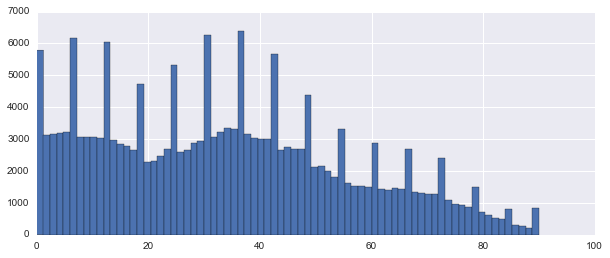


wage per hour


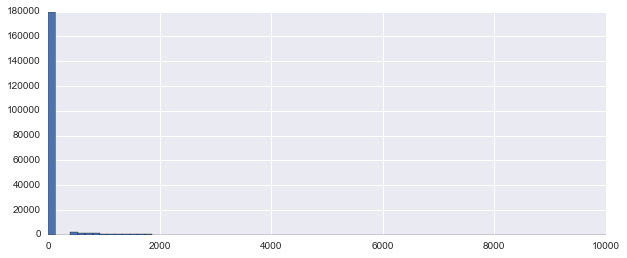


capital gains


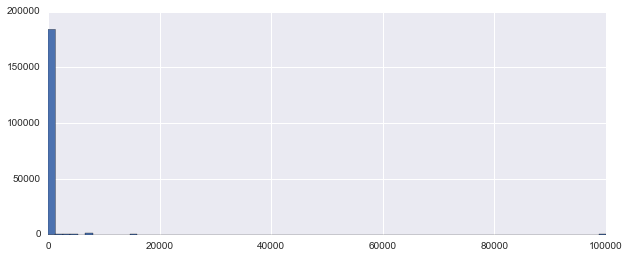


capital losses


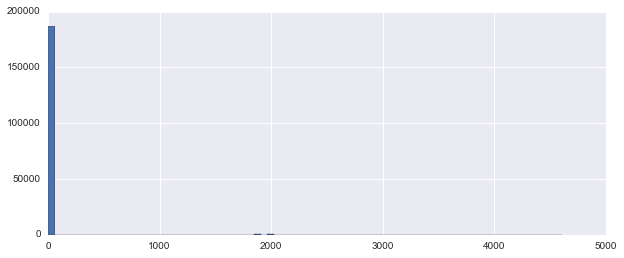


dividends from stocks


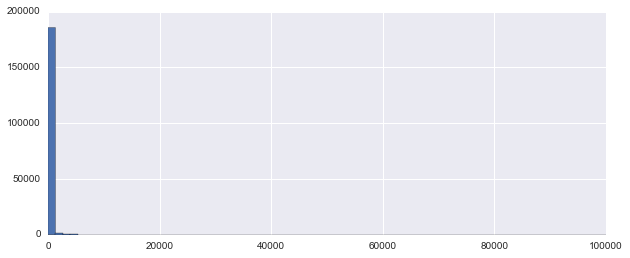


IDK


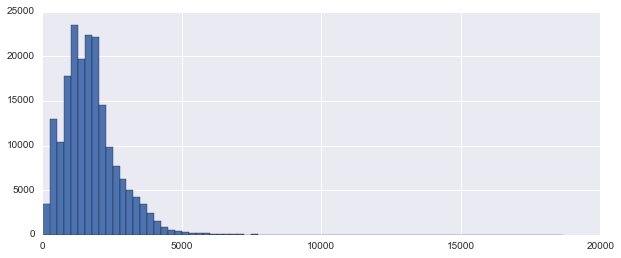


num persons worked for employer


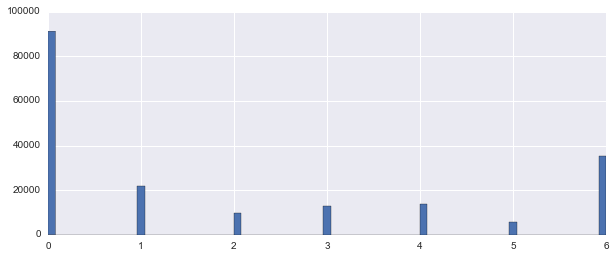


weeks worked in year


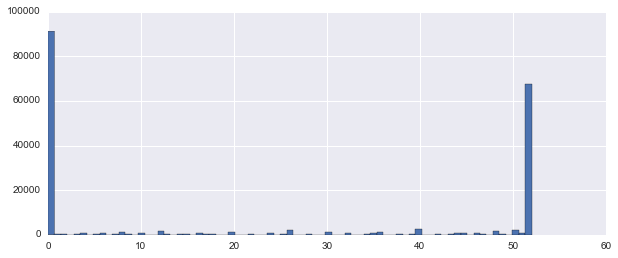

In [43]:
for val in numerical:
    print val
    cens[val].hist(figsize = (10,4), bins = 75)
    ax = plt.gca()
    plt.show()
    print ""
    
#there is seriously something messed up happening with age - lots of buckets that don't seem right
#most of the financial ones have 0 - which makes sense. might be worth to look with 0
#idk seems to be the most normal
#weeks one makes sense and so does num persons 

Mean age is 34 with a standard deviation of around 10

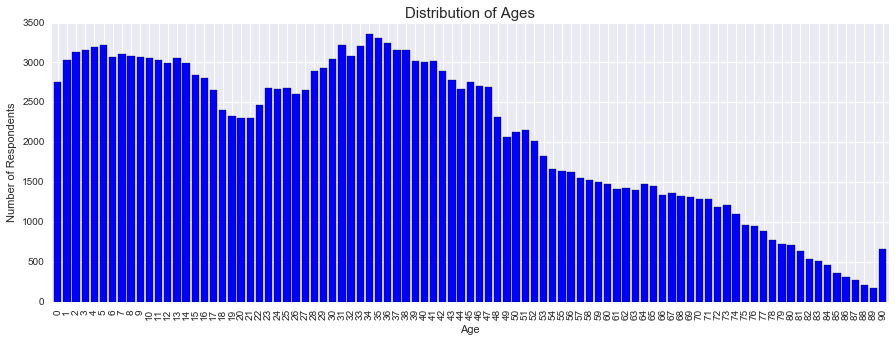

In [44]:
cens["age"].value_counts().sort_index().plot(kind = "bar", figsize = (15,5), color = "blue", width = .8)
ax = plt.gca()
ax.set_title("Distribution of Ages", size = 15)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Respondents")
plt.show()

#this is a much better understanding of the distribution

In [45]:
print cens["age"].median()

33.0


The distribution is bimodal - the majority of people who filled this out are in their late 20s - early 30s. There's a pretty steep drop off that starts to take place after 35. Also, there's a lot of people who have filled this out who are under 18 (it drops during that point). The assumption there is that parents are filling it out for their kids.

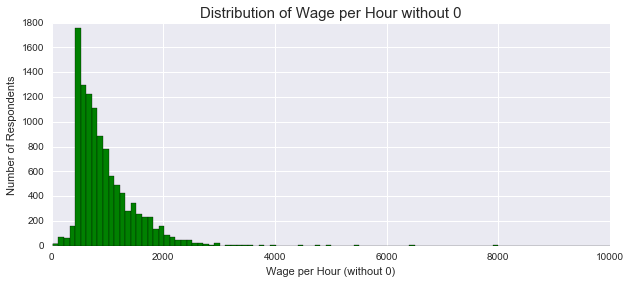

In [46]:
#let's move on to wage per hour

cens[cens["wage per hour"] != 0]["wage per hour"].hist(figsize = (10,4), bins = 100, color = "green")
ax = plt.gca()
ax.set_title("Distribution of Wage per Hour without 0", size = 15)
ax.set_xlabel("Wage per Hour (without 0)")
ax.set_ylabel("Number of Respondents")
plt.show()

In [47]:
print cens[cens["wage per hour"] != 0]["wage per hour"].median()

800.0


In [48]:
print float(len(cens[cens["wage per hour"] == 0])) / len(cens)

0.942548580245


Not including 0, wage per hour is unsurprisingly very right skewed with a few people who make a ton of income. Median is around 800.

It is worth noting that 94% of people actually don't have any sort of income being reported. 

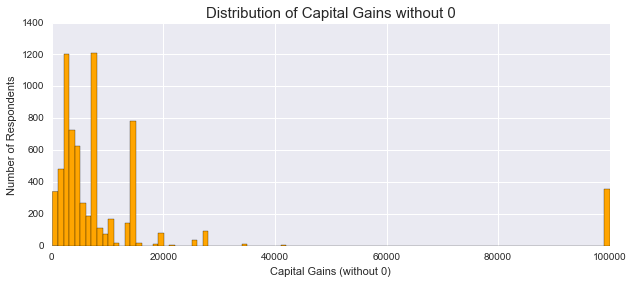

In [49]:
#let's move on to capital gains and losses

cens[cens["capital gains"] != 0]["capital gains"].hist(figsize = (10,4), bins = 100, color = "orange")
ax = plt.gca()
ax.set_title("Distribution of Capital Gains without 0", size = 15)
ax.set_xlabel("Capital Gains (without 0)")
ax.set_ylabel("Number of Respondents")
plt.show()

In [50]:
print cens[cens["capital gains"] != 0]["capital gains"].median()

5178.0


In [51]:
print float(len(cens[cens["capital gains"] == 0])) / len(cens)

0.963591710791


There's no real pattern to the distribution at all. But the bulk of people are on concentrated on the lower half of the spectrum, with a few random people making a lot of capital gains. However, the huge bulk of people don't have any sort of capital gains.

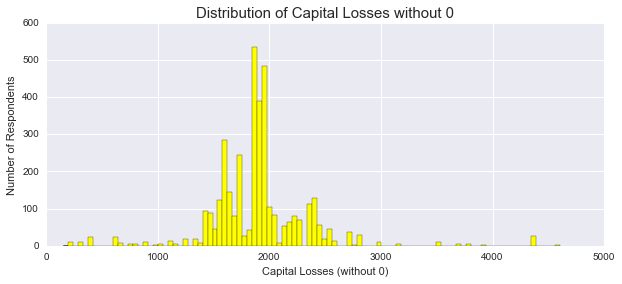

In [52]:
#let's move on to capital gains and losses

cens[cens["capital losses"] != 0]["capital losses"].hist(figsize = (10,4), bins = 100, color = "yellow")
ax = plt.gca()
ax.set_title("Distribution of Capital Losses without 0", size = 15)
ax.set_xlabel("Capital Losses (without 0)")
ax.set_ylabel("Number of Respondents")
plt.show()

In [53]:
print cens[cens["capital losses"] != 0]["capital losses"].median()

1887.0


In [54]:
print float(len(cens[cens["capital losses"] == 0])) / len(cens)

0.980604635786


This has more of a normal distribution, but this has even less respondents to it.

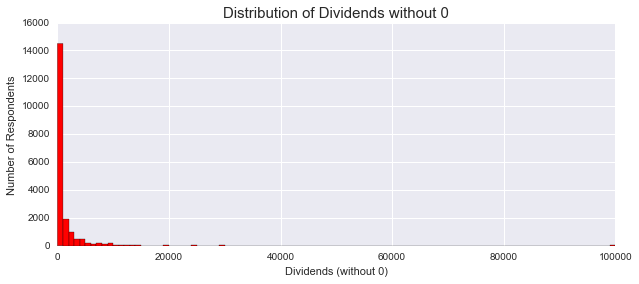

In [55]:
cens[cens["dividends from stocks"] != 0]["dividends from stocks"].hist(figsize = (10,4), bins = 100, color = "red")
ax = plt.gca()
ax.set_title("Distribution of Dividends without 0", size = 15)
ax.set_xlabel("Dividends (without 0)")
ax.set_ylabel("Number of Respondents")
plt.show()

In [56]:
print cens[cens["dividends from stocks"] != 0]["dividends from stocks"].median()

300.0


In [57]:
print float(len(cens[cens["dividends from stocks"] == 0])) / len(cens)

0.895702688378


Dividends is definitely an exponential distribution even without 0 - the bulk of people don't make that much from dividends, with only 90% of people who don't make any dividends at all. 
And, of course, there are a few people who are making a large amount of money from the dividends.

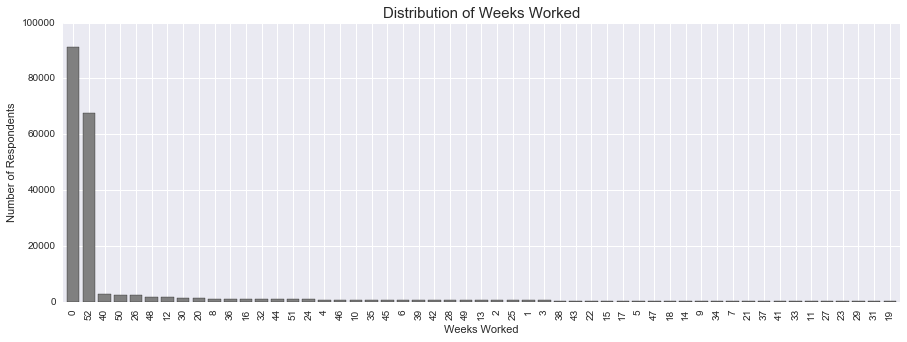

In [58]:
#lets look at weeks worked in year
cens["weeks worked in year"].value_counts().plot(kind = "bar", figsize = (15,5), color = "grey", width = .8)
ax = plt.gca()
ax.set_title("Distribution of Weeks Worked", size = 15)
ax.set_xlabel("Weeks Worked")
ax.set_ylabel("Number of Respondents")
plt.show()

#this is a much better understanding of the distribution

In [59]:
print float(len(cens[cens["weeks worked in year"] == 0])) / len(cens)

0.478723348429


In [60]:
print float(len(cens[cens["weeks worked in year"] == 52])) / len(cens)

0.353981139897


It looks like the bulk of people either work full time or not at all - everything else sort of drops off pretty dramatically.

From these findings, there's likely going to be a problem with learning the right classes - assuming that a lot of the people with capital gains and stocks will make a lot of money but the bulk of people don't. The same issue occurs with wage too.

Now we'll only look at the discrete variables individually to see if we can get a gauge of what's happening here.

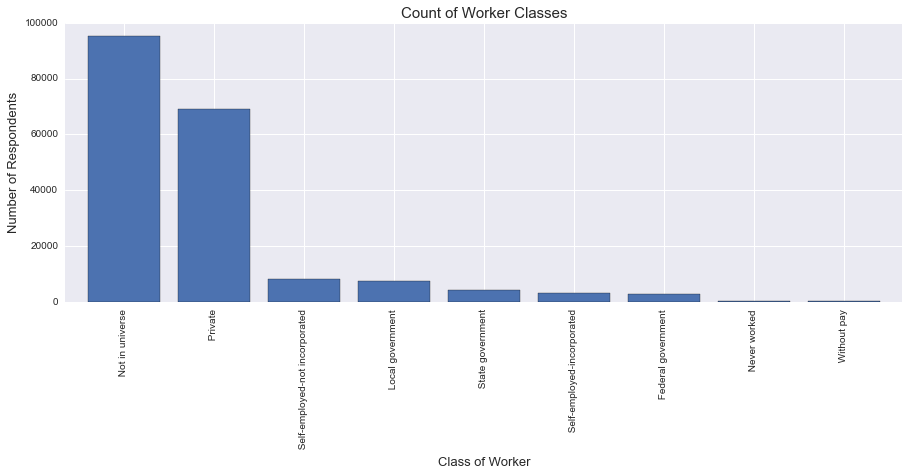

In [62]:
cens["class of worker"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Worker Classes", size = 15)
ax.set_xlabel("Class of Worker", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()


The bulk of people do not have responses to this - and those who do are mostly working in the private field

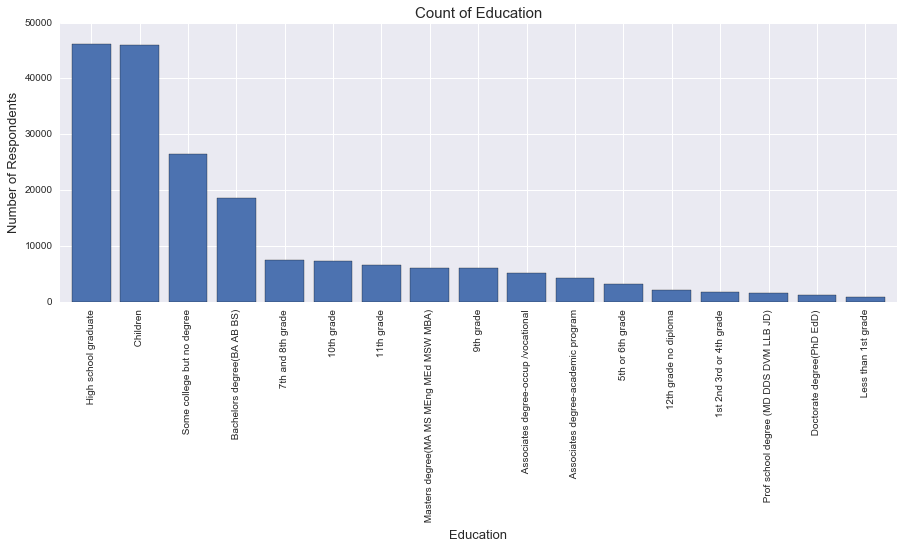

In [63]:
#skipping over the recodes - its hard to tell what they are
#the one with the actual labels will be better

cens["education"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Education", size = 15)
ax.set_xlabel("Education", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

The bulk of people are high school graduates or had at least attended some sort of college. The other half are children which makes sense given the age of the respondents.

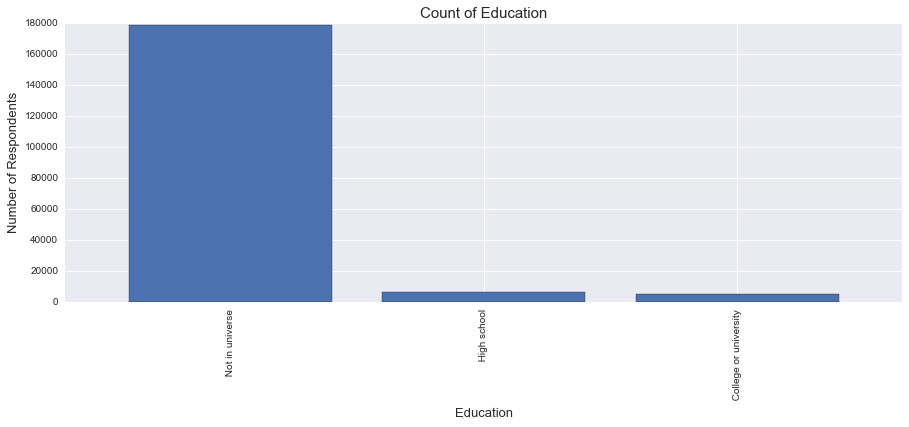

In [64]:
cens["enroll in edu inst last wk"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Education", size = 15)
ax.set_xlabel("Education", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Unsurprisingly the bulk of people are not in school during the past week.

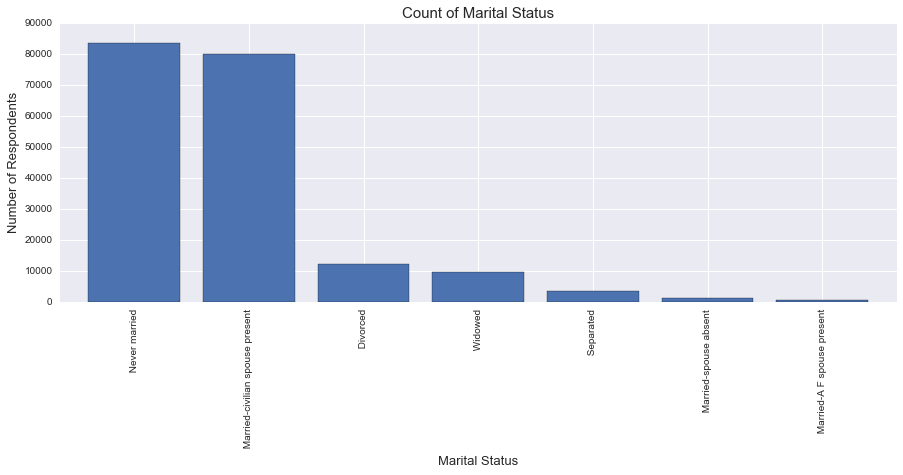

In [65]:
cens["marital stat"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Marital Status", size = 15)
ax.set_xlabel("Marital Status", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Bulk of respondents are never married or married - not too much variation here

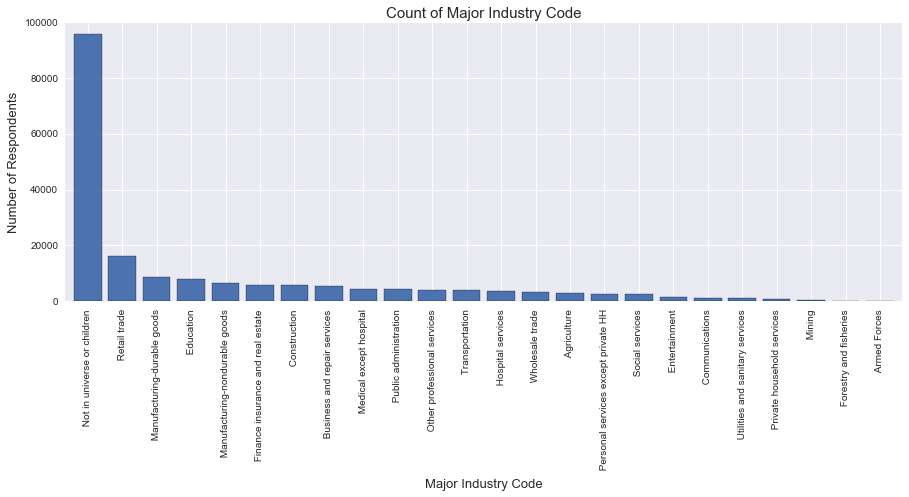

In [66]:
cens["major industry code"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Major Industry Code", size = 15)
ax.set_xlabel("Major Industry Code", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Retail by far is the most populated industry

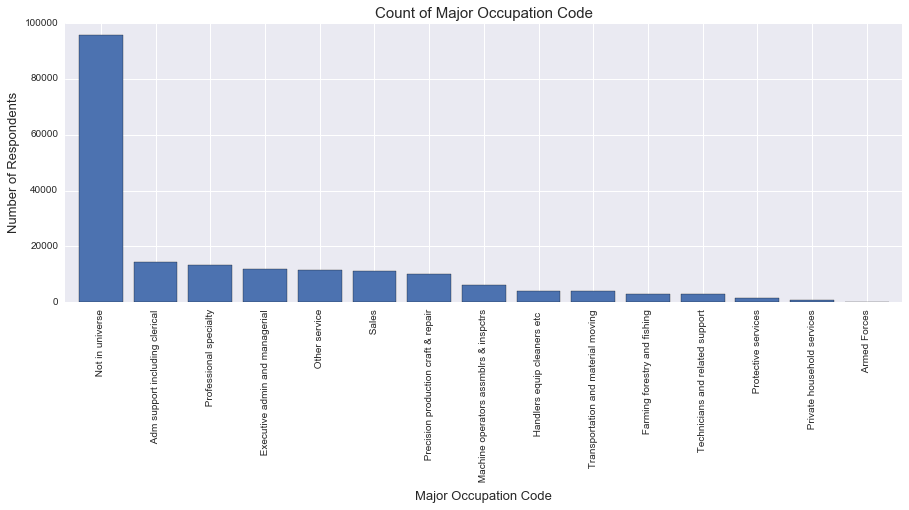

In [67]:
cens["major occupation code"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Major Occupation Code", size = 15)
ax.set_xlabel("Major Occupation Code", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

#hard to tell whats going on here. lets take out the "not in universe bit"

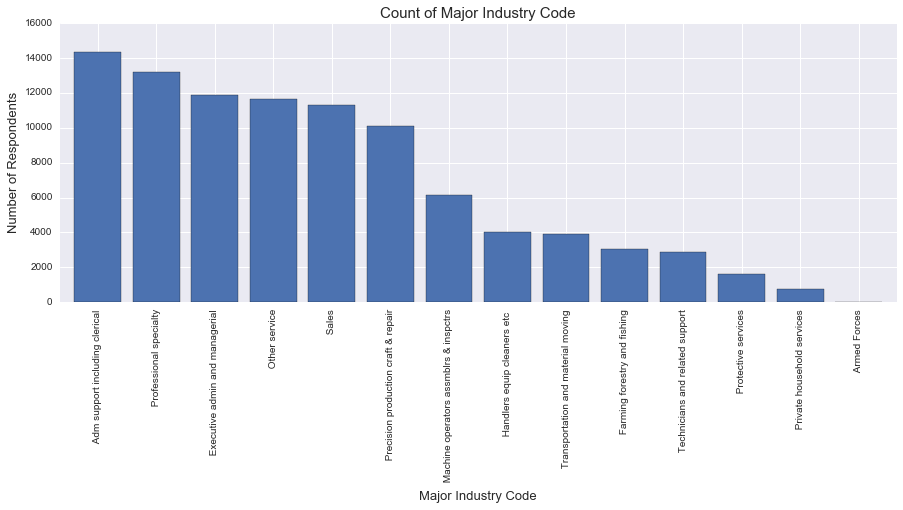

In [68]:
cens[cens["major occupation code"] != " Not in universe"]["major occupation code"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Major Industry Code", size = 15)
ax.set_xlabel("Major Industry Code", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

The bulk of people who do work are generally in some sort of admin support, or a professional. This seems mostly white collar positions.

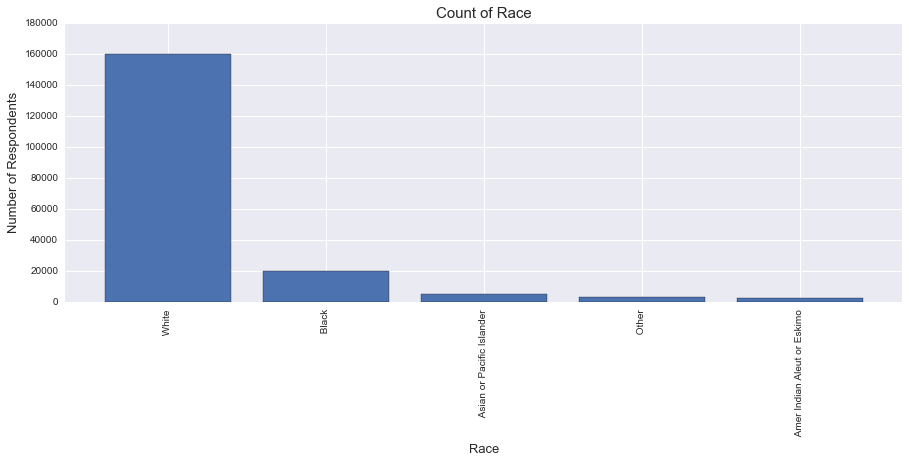

In [69]:
cens["race"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Race", size = 15)
ax.set_xlabel("Race", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Majority of respondents are unsurprisingly white - next group is black.

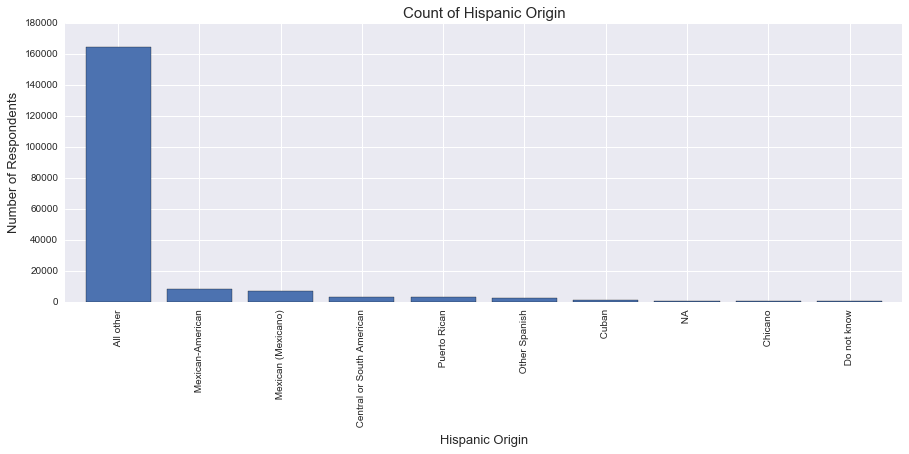

In [70]:
cens["hispanic origin"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Hispanic Origin", size = 15)
ax.set_xlabel("Hispanic Origin", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

#not sure how helpful this is

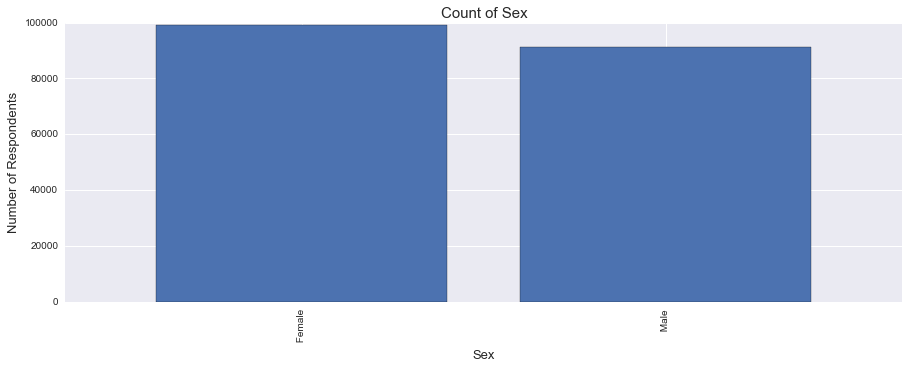

In [71]:
cens["sex"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Sex", size = 15)
ax.set_xlabel("Sex", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

The bulk of respondents were female vs male

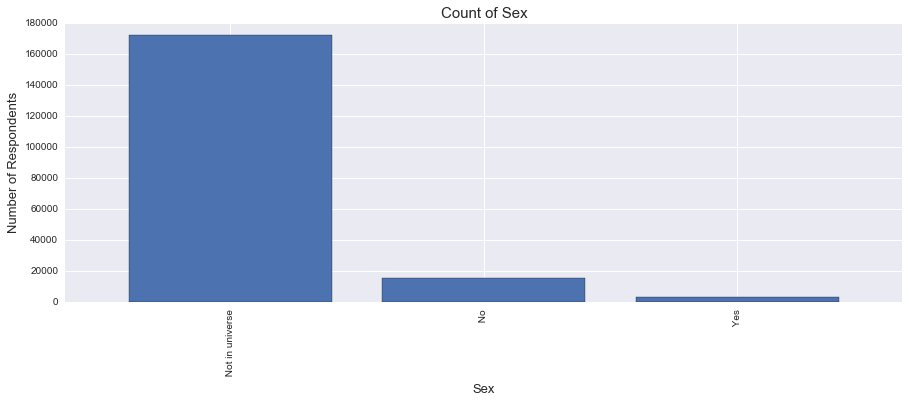

In [72]:
cens["member of a labor union"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Sex", size = 15)
ax.set_xlabel("Sex", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Unsurprisingly then, the bulk of peopel aren't in a union given their occupations.

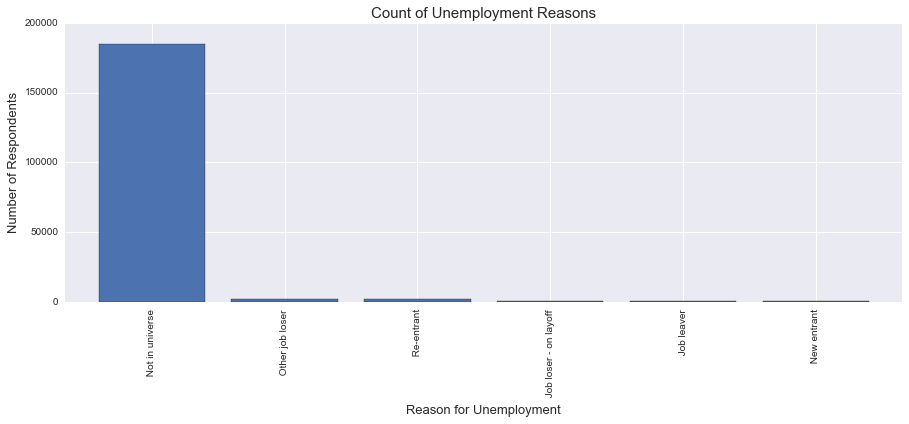

In [73]:
cens["reason for unemployment"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Unemployment Reasons", size = 15)
ax.set_xlabel("Reason for Unemployment", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

#not sure how useful this is for our ultimate goal. these people wouldn't matter

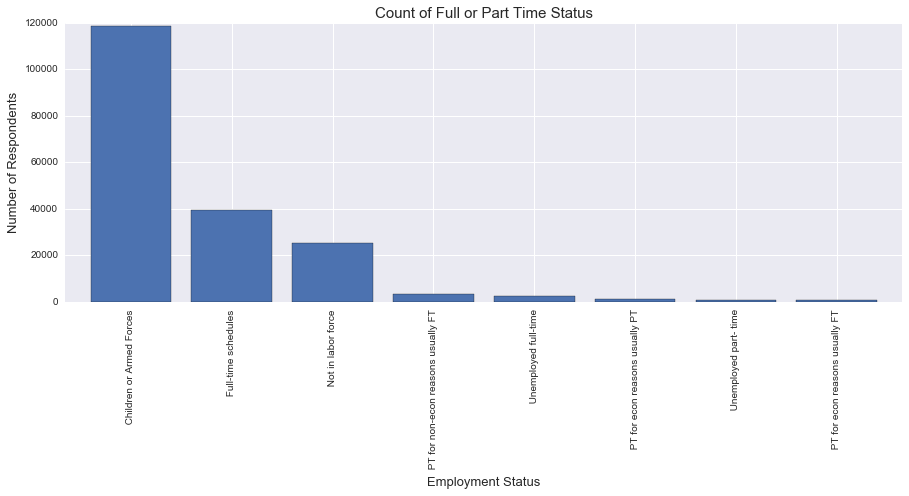

In [74]:
cens["full or part time employment stat"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Full or Part Time Status", size = 15)
ax.set_xlabel("Employment Status", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

#not sure how useful this is for our ultimate goal. these people wouldn't matter

Majority of people are actually children or armed forces - might be a problem later

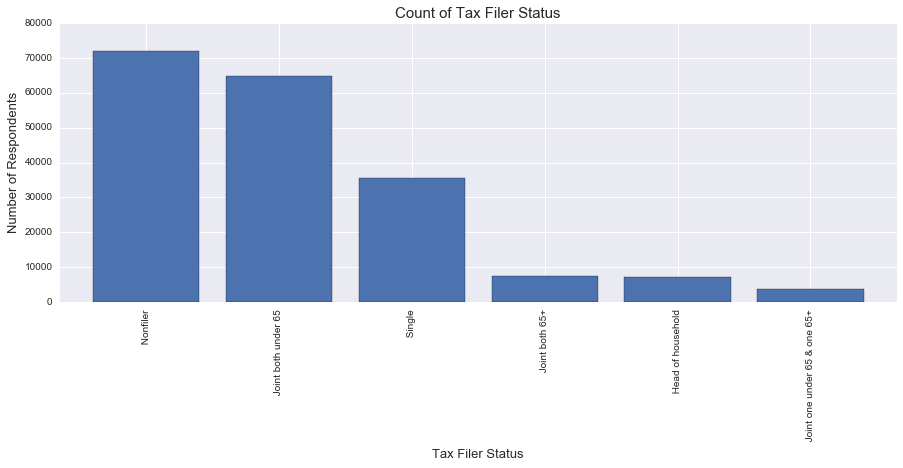

In [75]:
cens["tax filer stat"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Tax Filer Status", size = 15)
ax.set_xlabel("Tax Filer Status", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Bulk of people are unsurprisingly nonfilers, but of those who do file, most of them are married

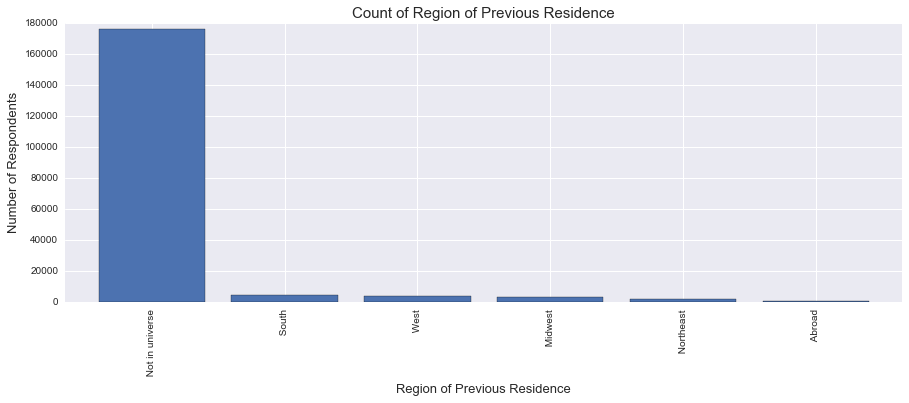

In [76]:
cens["region of previous residence"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Region of Previous Residence", size = 15)
ax.set_xlabel("Region of Previous Residence", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

#this isn't terribly helpful either since the majority aren't in the universe

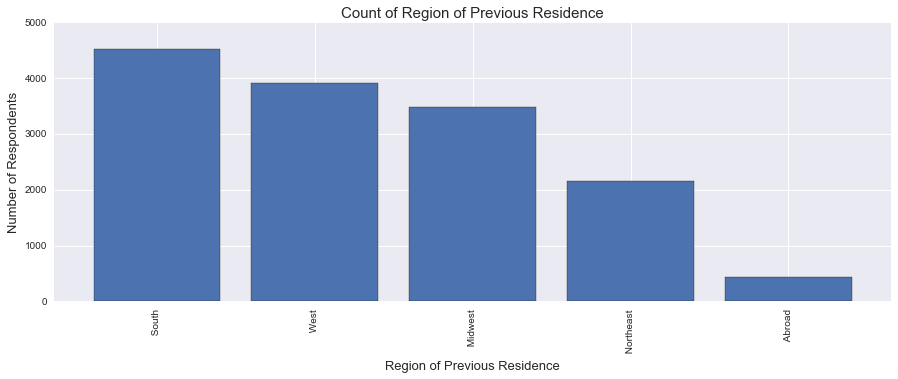

In [77]:
cens[cens["region of previous residence"] != ' Not in universe']["region of previous residence"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Region of Previous Residence", size = 15)
ax.set_xlabel("Region of Previous Residence", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

The South definitely holds the most respondents for previous residences

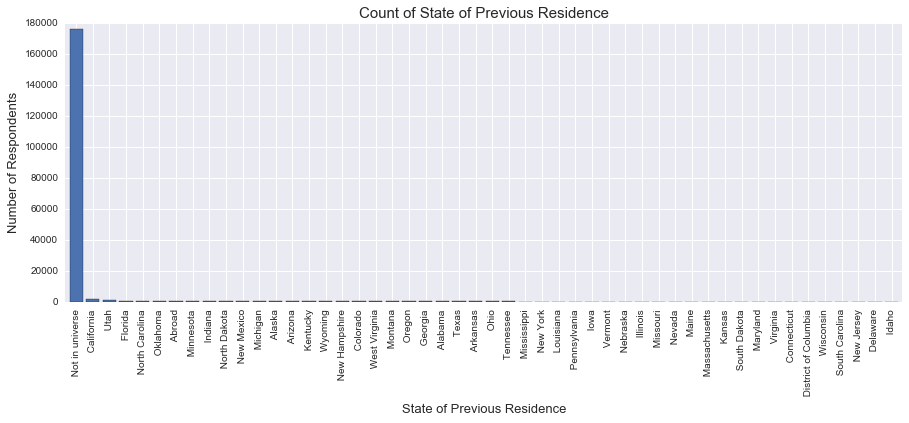

In [78]:
cens["state of previous residence"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of State of Previous Residence", size = 15)
ax.set_xlabel("State of Previous Residence", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

#pretty useless

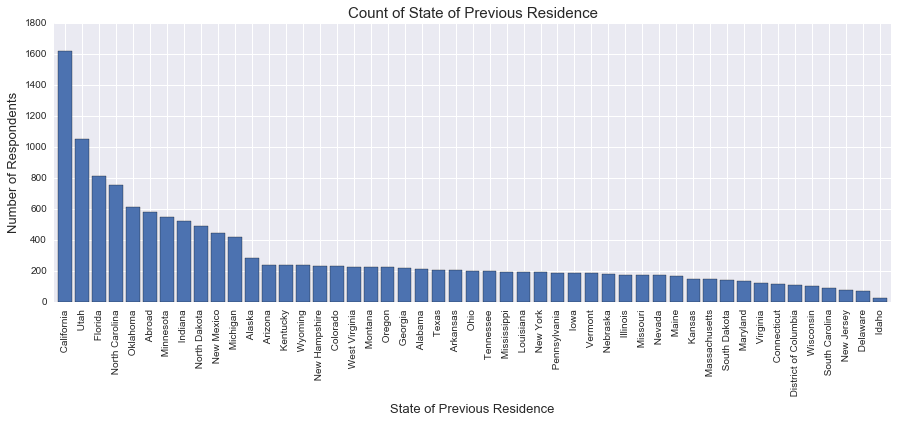

In [79]:
cens[cens["state of previous residence"] != ' Not in universe']["state of previous residence"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of State of Previous Residence", size = 15)
ax.set_xlabel("State of Previous Residence", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Unsurprising that California has the highest population - strange that Utah has the second highest amount though.

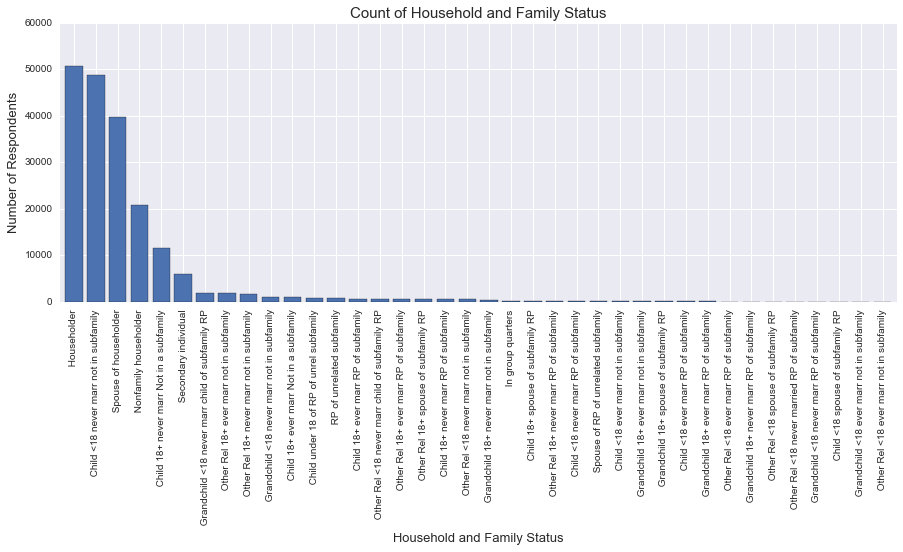

In [80]:
cens["detailed household and family stat"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Household and Family Status", size = 15)
ax.set_xlabel("Household and Family Status", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

In [81]:
cens["detailed household and family stat"].value_counts()

 Householder                                        50652
 Child <18 never marr not in subfamily              48702
 Spouse of householder                              39747
 Nonfamily householder                              20701
 Child 18+ never marr Not in a subfamily            11617
 Secondary individual                                5845
 Grandchild <18 never marr child of subfamily RP     1830
 Other Rel 18+ ever marr not in subfamily            1797
 Other Rel 18+ never marr not in subfamily           1610
 Grandchild <18 never marr not in subfamily          1048
 Child 18+ ever marr Not in a subfamily               989
 Child under 18 of RP of unrel subfamily              719
 RP of unrelated subfamily                            660
 Child 18+ ever marr RP of subfamily                  647
 Other Rel <18 never marr child of subfamily RP       640
 Other Rel 18+ ever marr RP of subfamily              608
 Other Rel 18+ spouse of subfamily RP                 589
 Child 18+ nev

This again shows how many people in this survey are actually under 18 - this might benefit from being rolled up potentially too just because its incredibly detailed and may not be necessary.

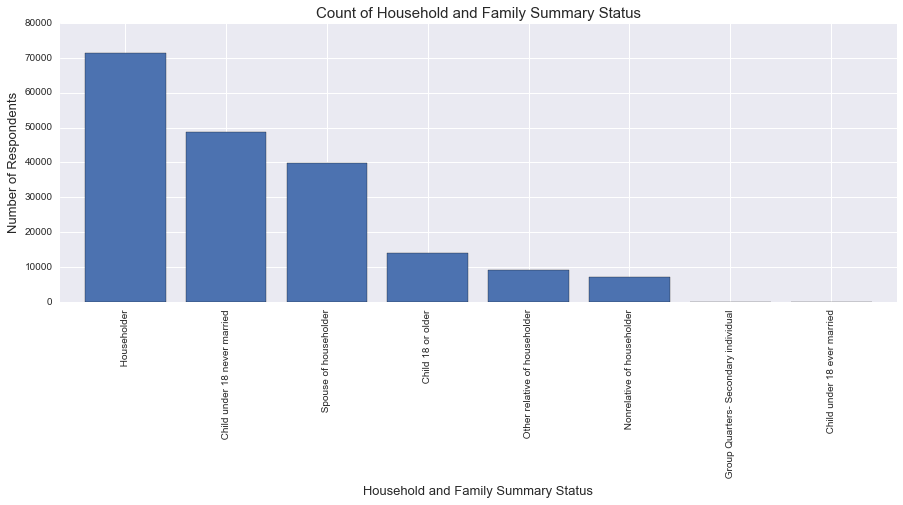

In [82]:
cens["detailed household summary in household"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Household and Family Summary Status", size = 15)
ax.set_xlabel("Household and Family Summary Status", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

This seems much more reasonable to use - than the other. Consider deleting the "detailed household and family stat". Only one of these can remain since these are definitely collinear

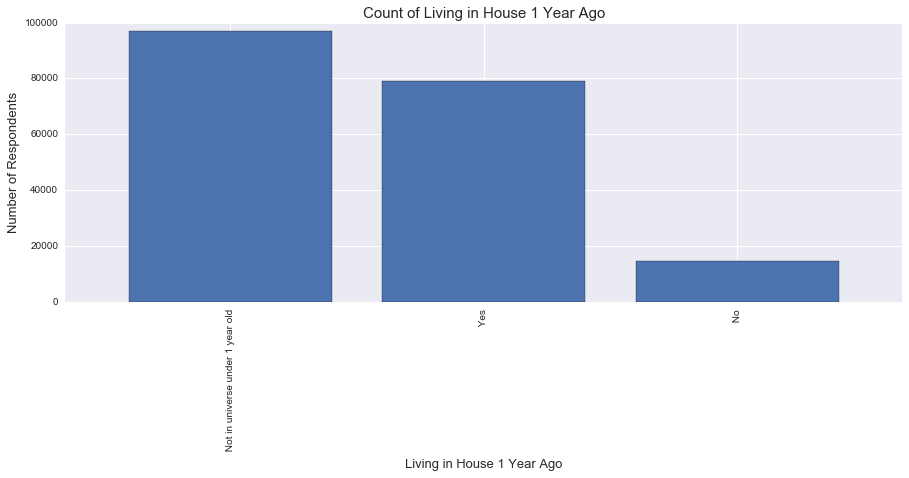

In [83]:
cens["live in this house 1 year ago"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Living in House 1 Year Ago", size = 15)
ax.set_xlabel("Living in House 1 Year Ago", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Surprisingly, it looks like a lot of the houses that are there were under 1 year old. So, people either have lived there for over a year or just made their house, vs having just moved.

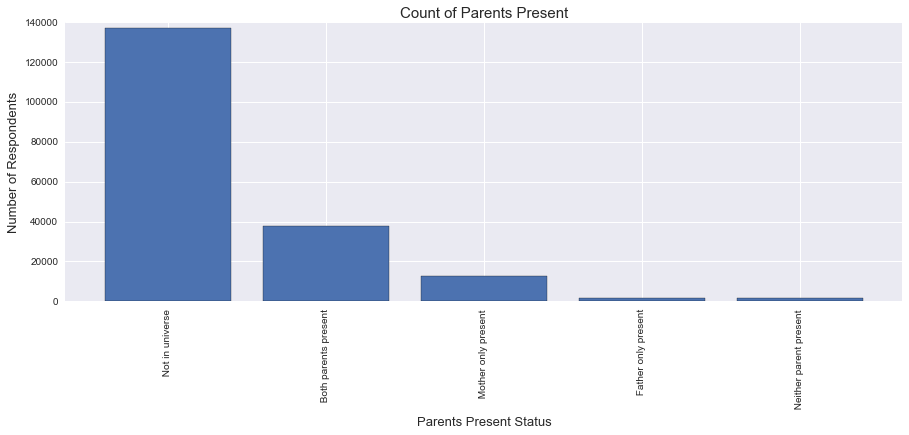

In [84]:
cens["family members under 18"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Parents Present", size = 15)
ax.set_xlabel("Parents Present Status", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

This might be interesting later on - seems like the bulk of respondents have the both parents in household vs not.

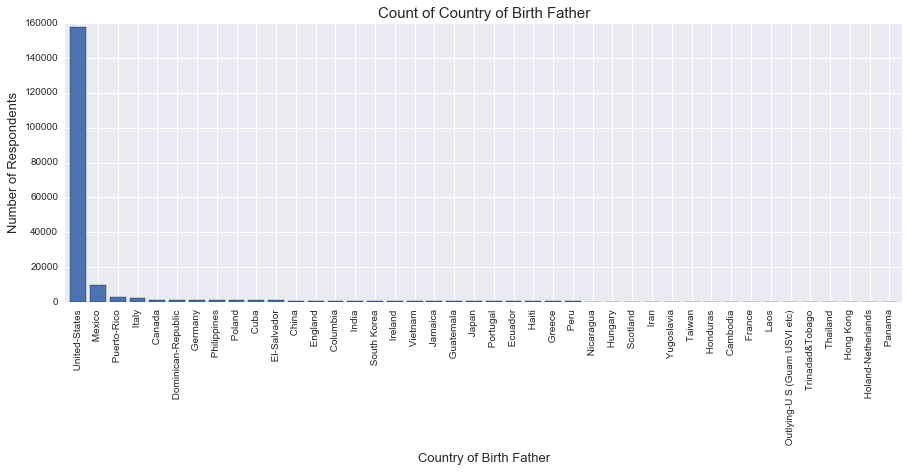

In [85]:
cens["country of birth father"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Country of Birth Father", size = 15)
ax.set_xlabel("Country of Birth Father", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Bulk of respondents are American born, with the subsequent countries from the immediate Latin American countries.

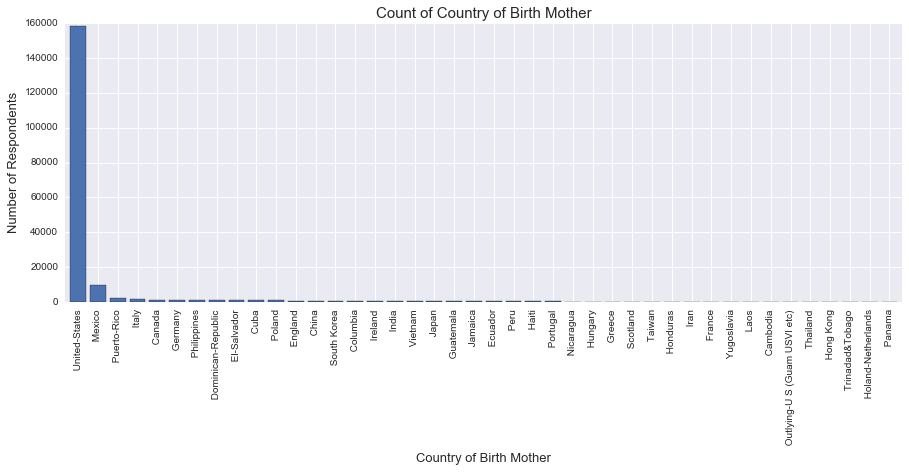

In [86]:
cens["country of birth mother"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Country of Birth Mother", size = 15)
ax.set_xlabel("Country of Birth Mother", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Birth mother shows a similar story as birth father

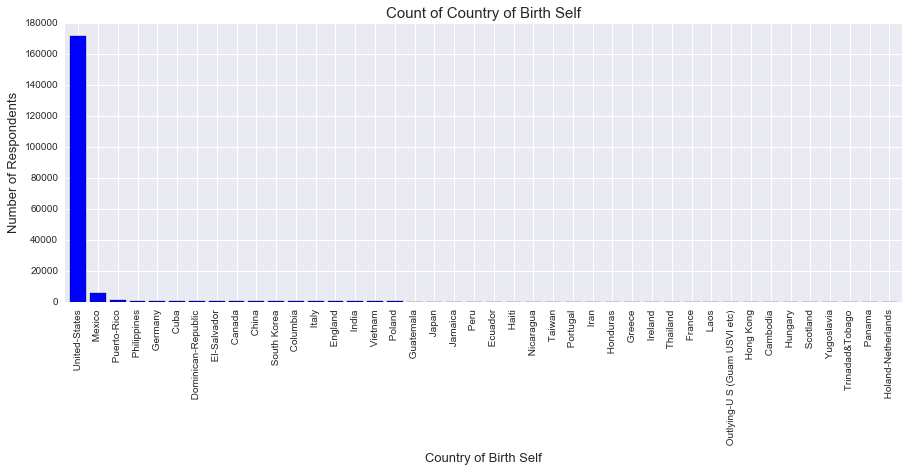

In [87]:
cens["country of birth self"].value_counts().plot(kind = "bar", color = "blue", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Country of Birth Self", size = 15)
ax.set_xlabel("Country of Birth Self", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Birth self tells a similar story although there seems to be more Asians. Let's try and plot this all together'

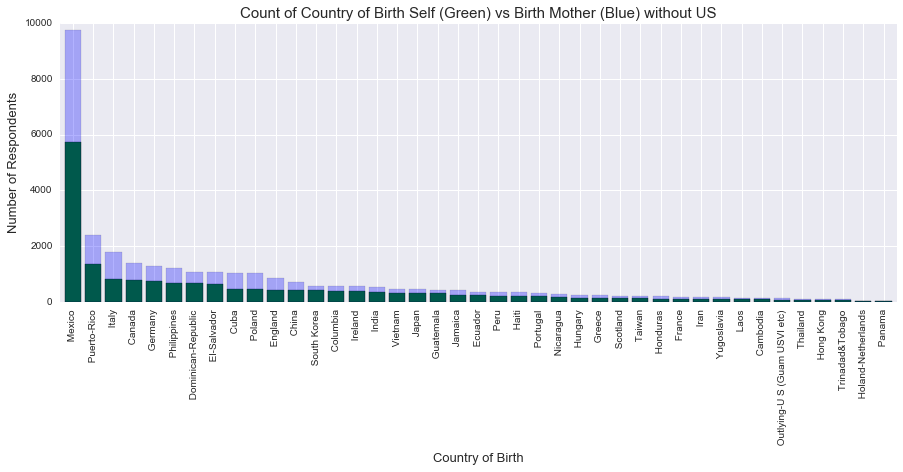

In [88]:
cens[cens["country of birth self"] != " United-States"]["country of birth self"].value_counts().plot(kind = "bar", color = "green", figsize = (15,5), width = .8)
cens[cens["country of birth mother"] != " United-States"]["country of birth mother"].value_counts().plot(kind = "bar", color = "blue", figsize = (15,5), width = .8, alpha = .3 )
ax = plt.gca()
ax.set_title("Count of Country of Birth Self (Green) vs Birth Mother (Blue) without US", size = 15)
ax.set_xlabel("Country of Birth", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Only plotted two of them since Birth mother and birth father were so similar. It looks like there are way less Mexican born people as we look at self - the proportions do become different when we look at the Asian Countries.

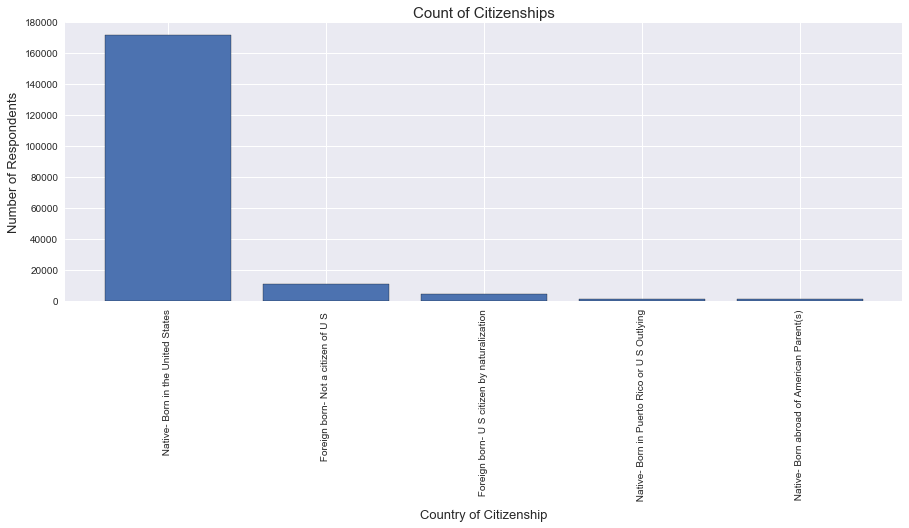

In [89]:
cens["citizenship"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Citizenships", size = 15)
ax.set_xlabel("Country of Citizenship", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Majority were born in the US - this might be duplicative of the country of born self as well. Consider consolidating a the country ones.

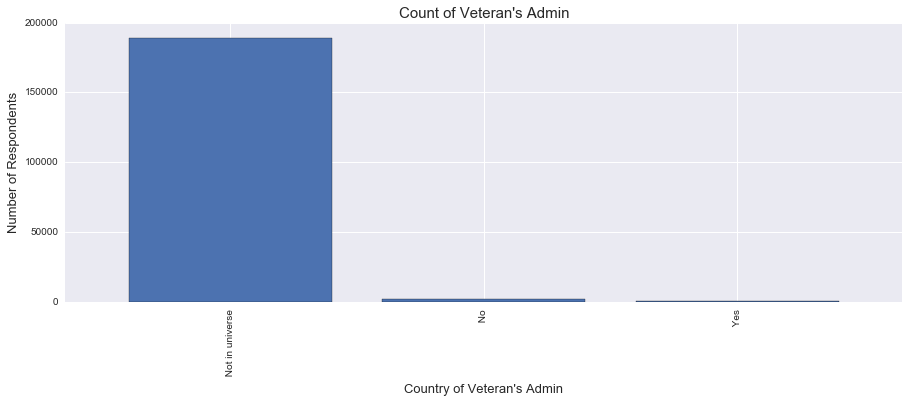

In [90]:
cens["fill inc questionnaire for veteran's admin"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Veteran's Admin", size = 15)
ax.set_xlabel("Country of Veteran's Admin", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

Not too much going on here aside from not enough the fact that not a lot of people had signed up for veterans

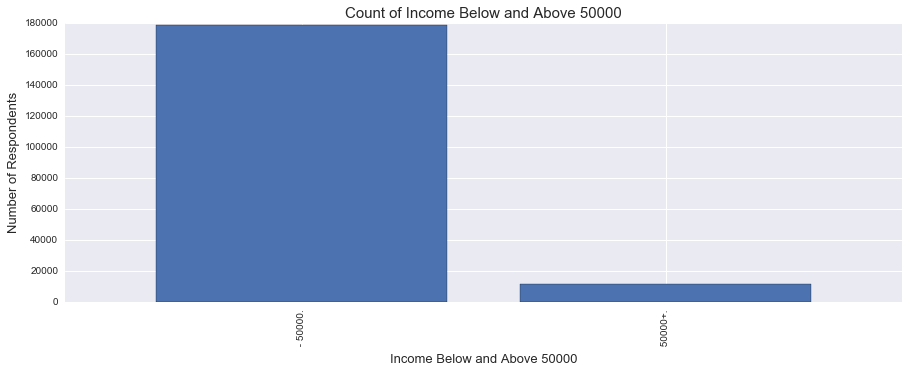

In [91]:
cens["+/- 5000"].value_counts().plot(kind = "bar", figsize = (15,5), width = .8)
ax = plt.gca()
ax.set_title("Count of Income Below and Above 50000", size = 15)
ax.set_xlabel("Income Below and Above 50000", size = 13)
ax.set_ylabel("Number of Respondents", size = 13)
plt.show()

In [92]:
cens["+/- 5000"].value_counts()

 - 50000.    178904
 50000+.      11657
Name: +/- 5000, dtype: int64

Univariate analysis showed that there's actually a ton of people who are under 18 and thus not working in this analysis. This will make it very easy to find people who are making under 50,000 for the analysis, but not so easy to find those who make 50000+. It might be good to binarize a lot of these values depending on how they are shaking out.

There are also seems to be a lot of potentially duplicative factors that we can remove.

Next step is to figure out which factors are the most impactful in attributing to the -50000 and +50000 factor.

#### Finding Correlations

In [28]:
#convert target variable into 0s and 1s to make it easier to process

cens["target"] = cens["+/- 5000"].apply(lambda x: 0 if x == " - 50000." else 1)

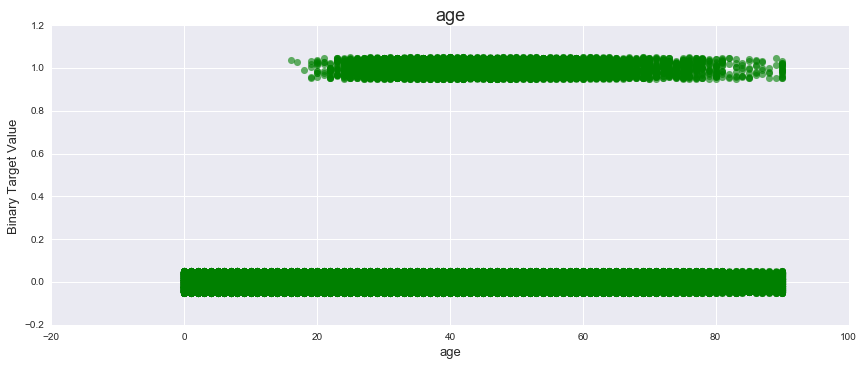

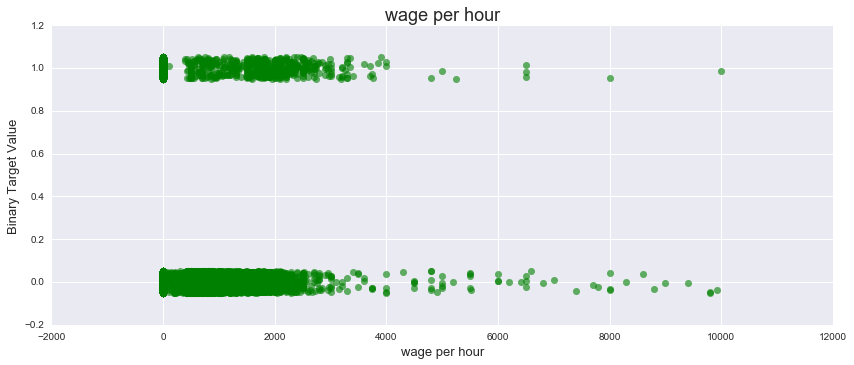

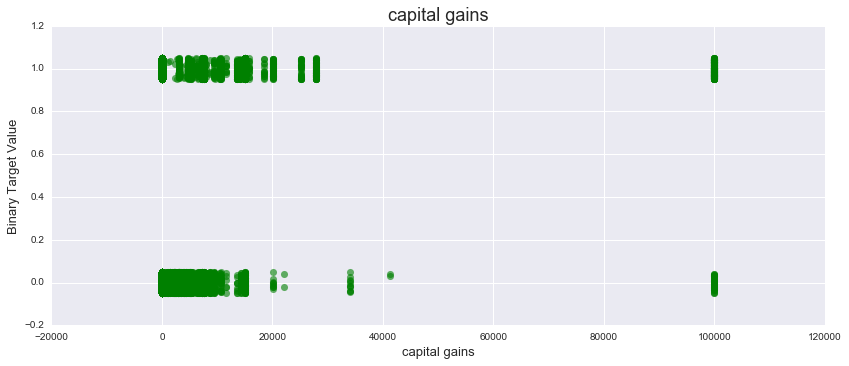

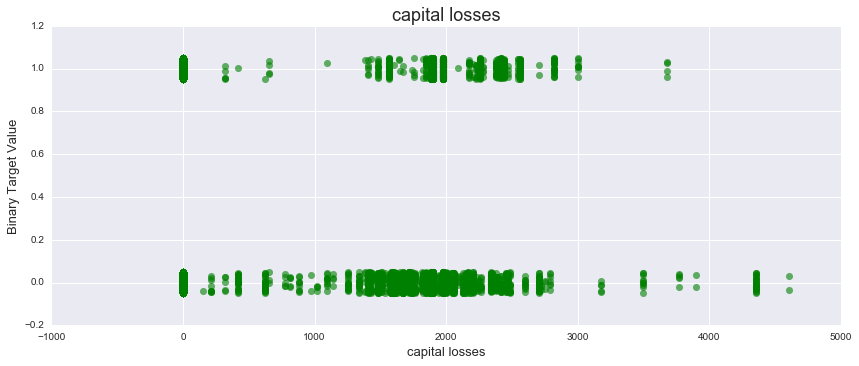

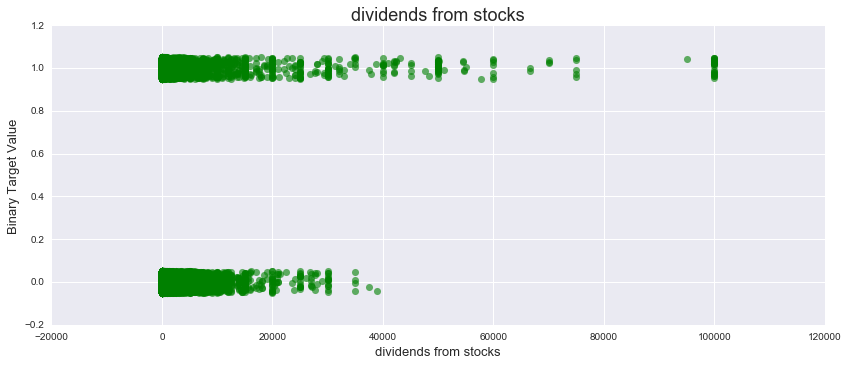

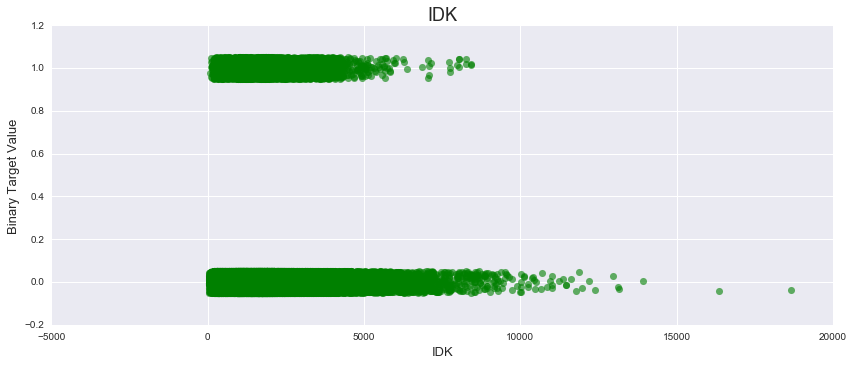

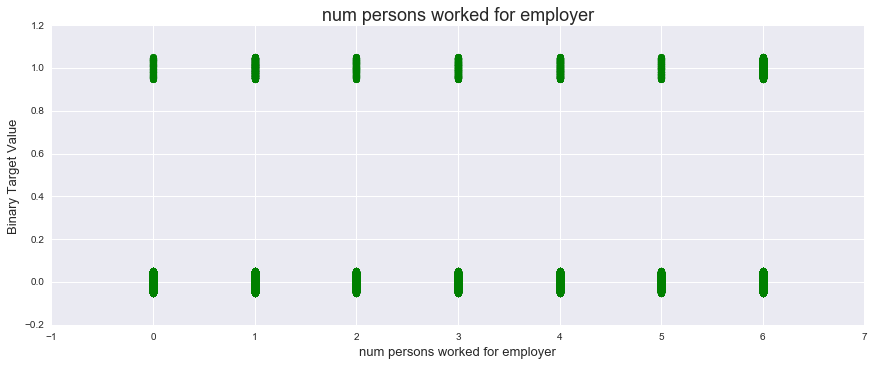

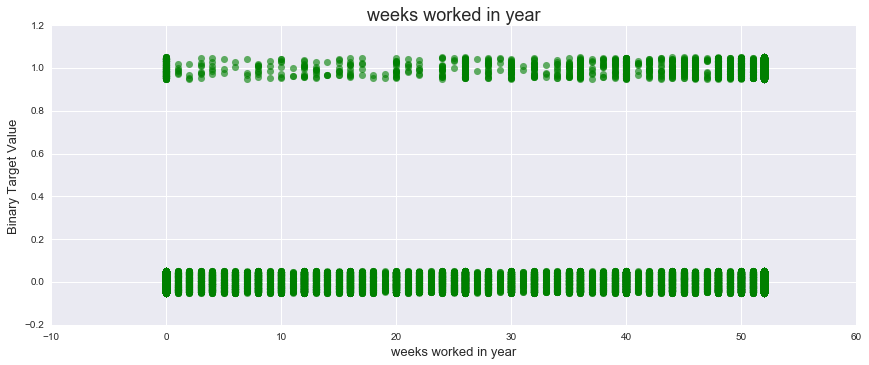

In [94]:
#plot all the numerical values to see which ones def have an impact
#these have to be jittered for display purposes only

for label in cens[numerical].columns:
    ax = sns.lmplot(x=label, y="target", data=cens, fit_reg=False, y_jitter=0.05, scatter_kws={'alpha':0.6, "s":50, "color":"green"})
    ax = plt.gca()
    ax.figure.set_size_inches(14,5)
    ax.set_title(label, size = 18)
    ax.set_xlabel(label, size = 13)
    ax.set_ylabel("Binary Target Value", size = 13)
    plt.show()

From an intial look, it does look like factors like:
- Dividends from Stocks
- Wage per hour (which was weird)
- Age

Matter the most.

It is worth noting that the wage per hour shows that those who have a greater range of wages are the ones that have the least income. A lot of the income then likely doesn't come purely from working but also from likely things like investments.

In [29]:
#will begin to encode the categorical variables

from sklearn.preprocessing import LabelEncoder

In [30]:
#per categorical data, encode and add on a new label
for cols in cens.columns[:-2] - cens[numerical].columns:
    new_label = cols + " encoded"
    le = LabelEncoder()
    le.fit(cens[cols])
    cens[new_label] = le.transform(cens[cols])

/Users/katty/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


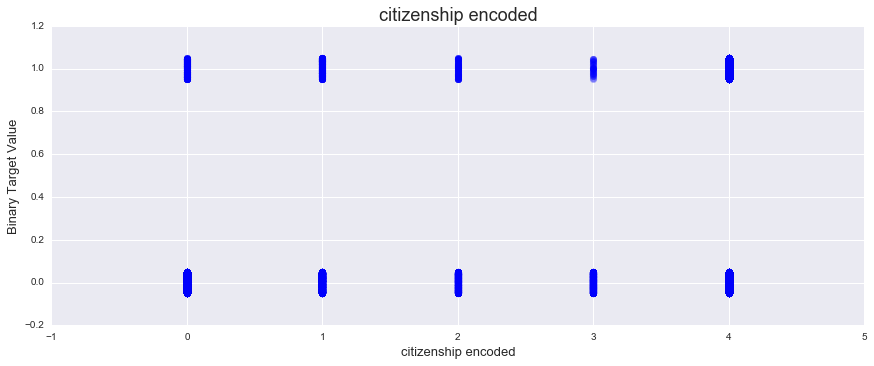

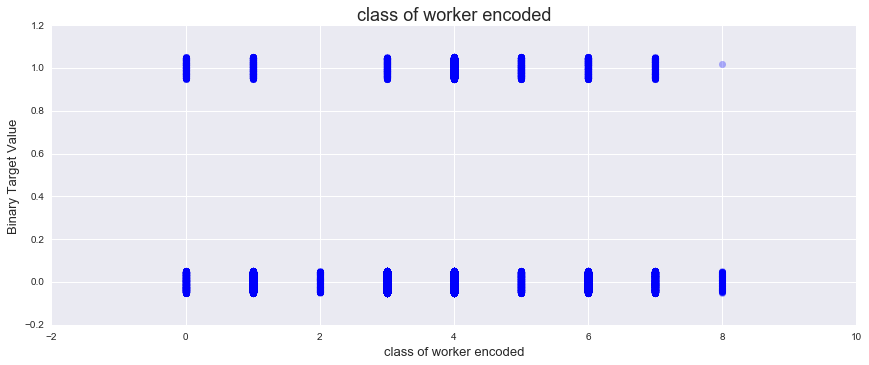

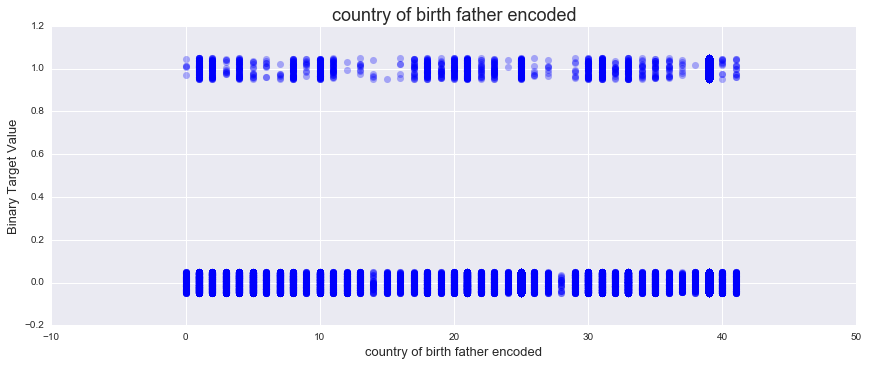

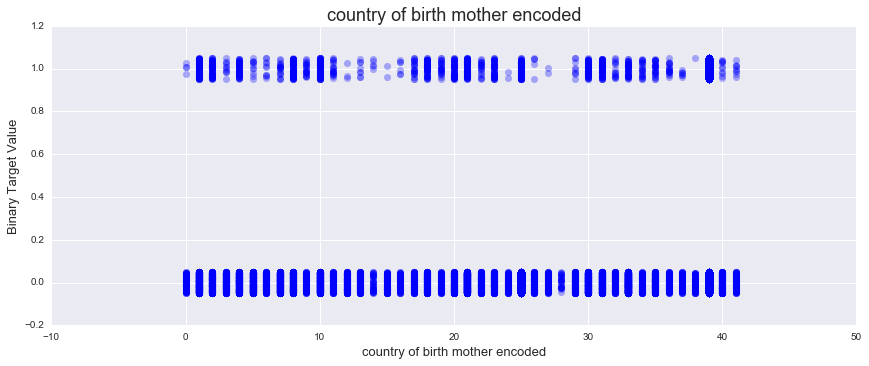

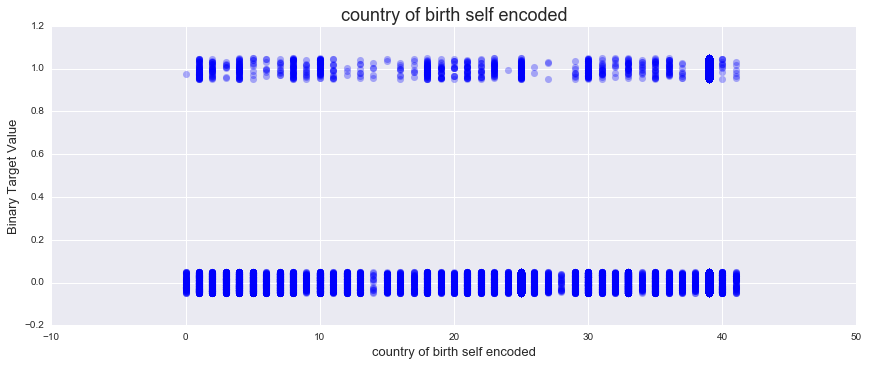

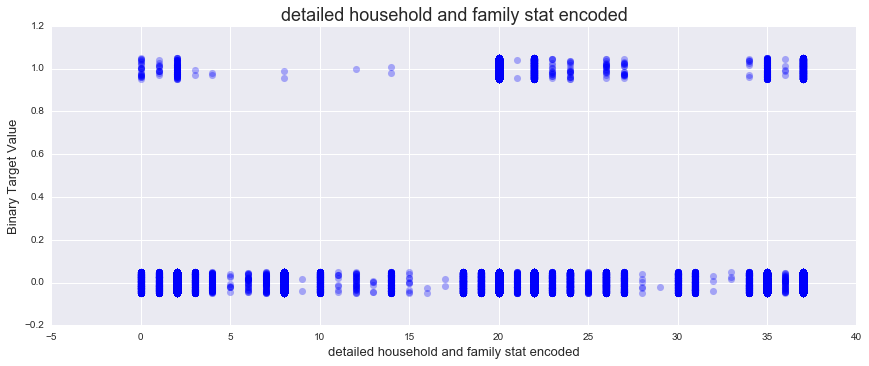

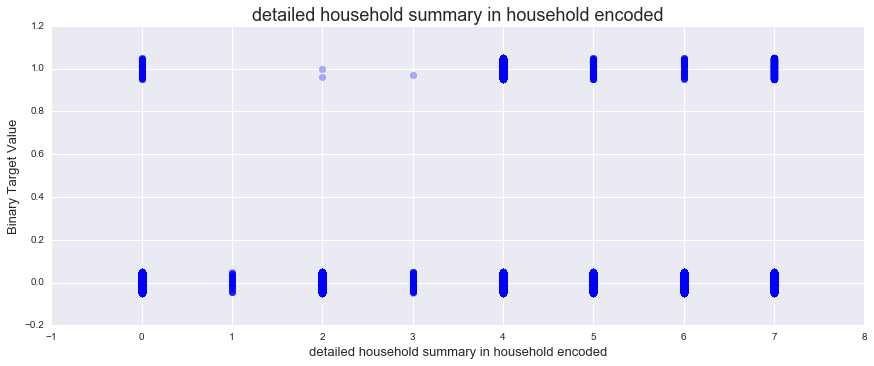

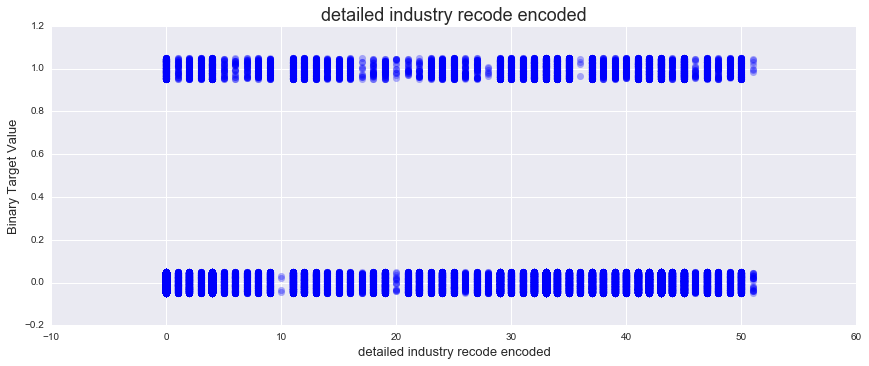

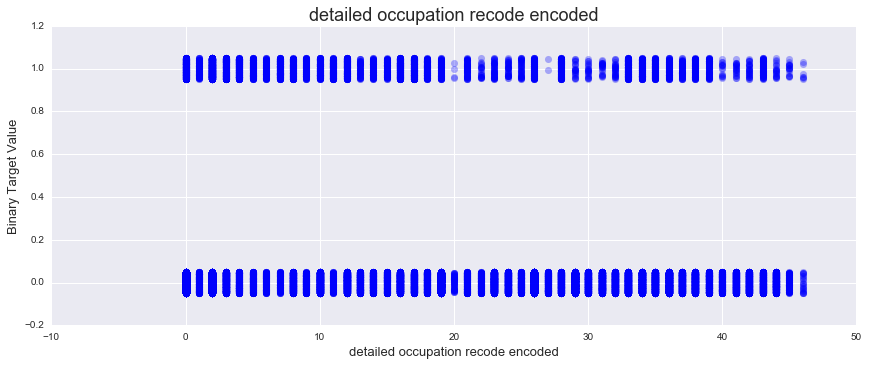

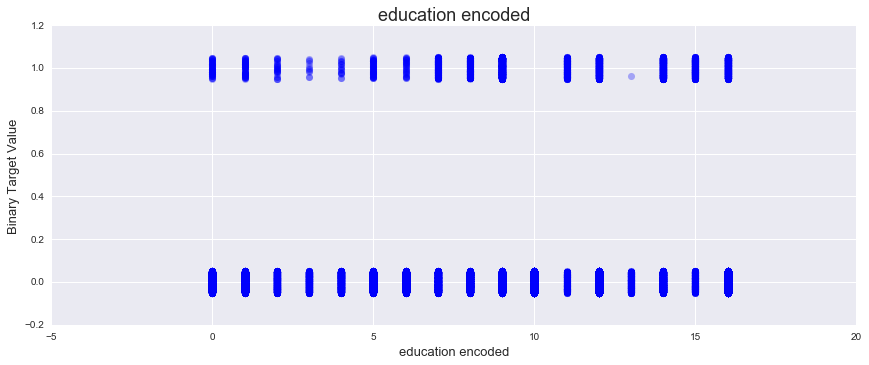

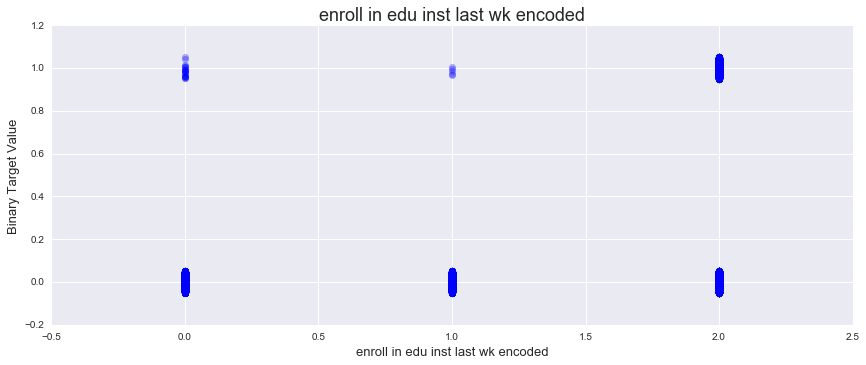

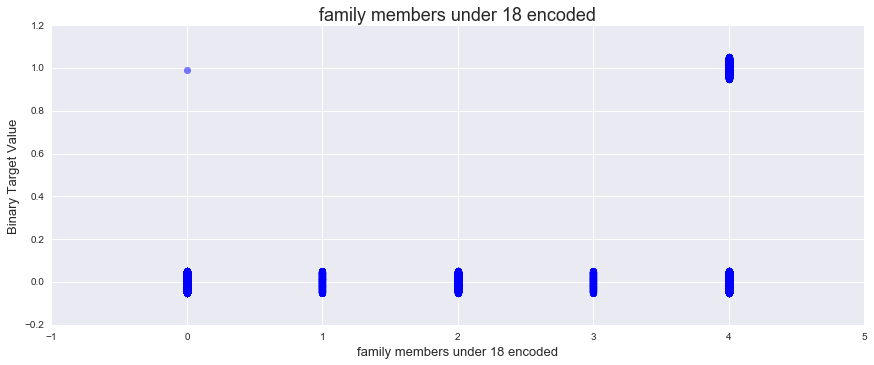

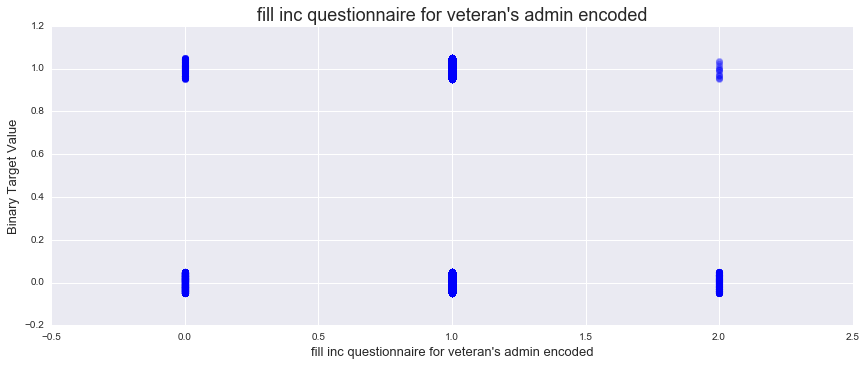

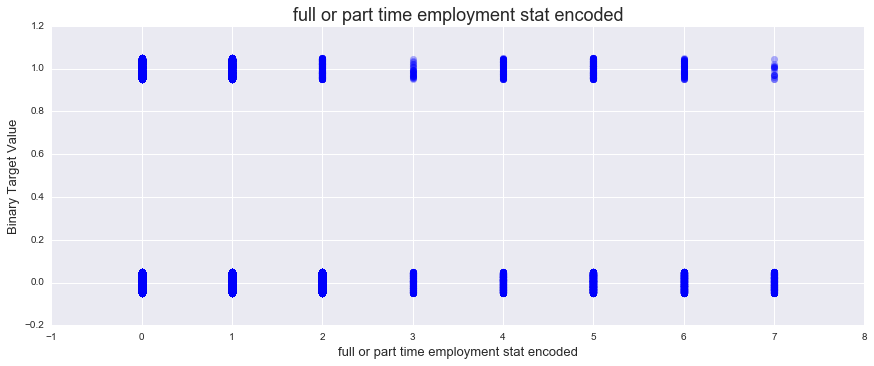

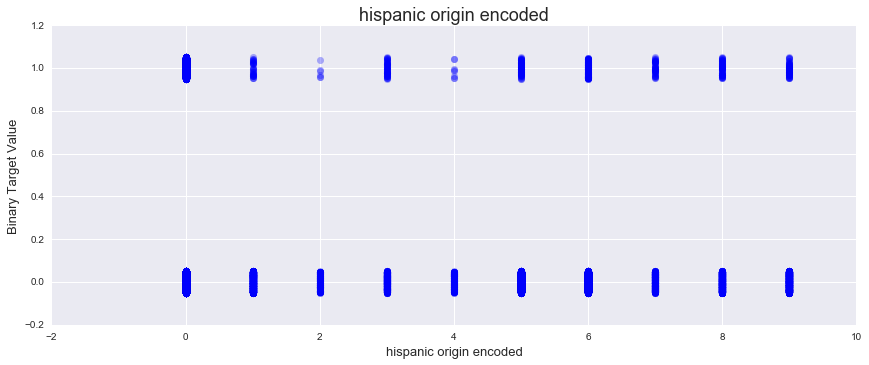

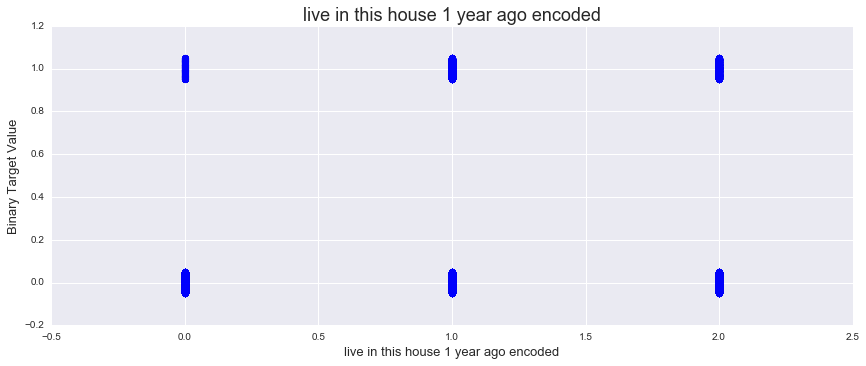

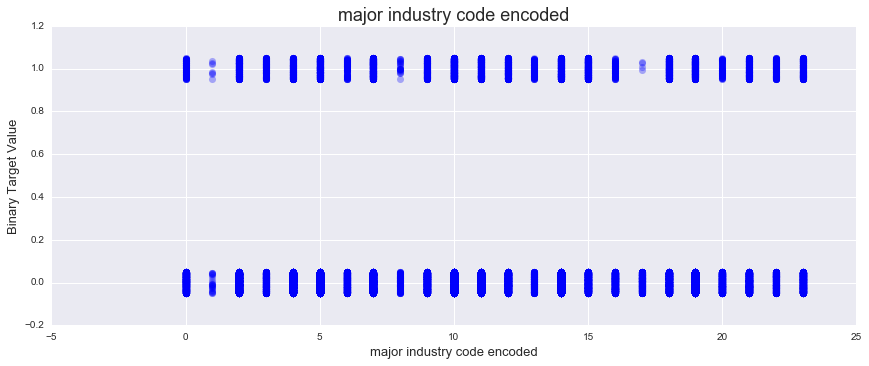

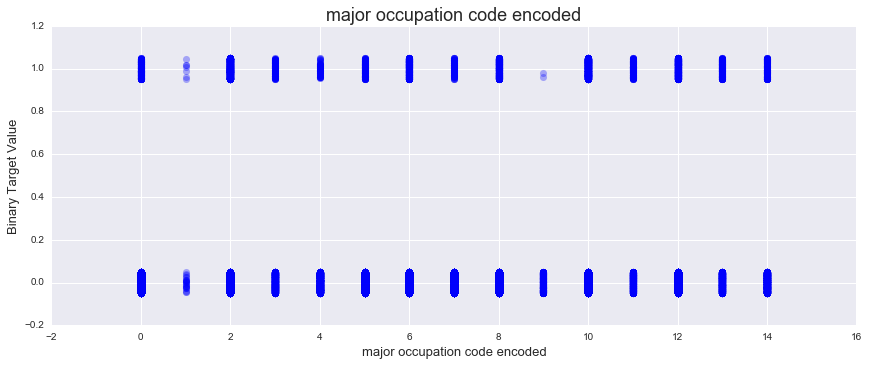

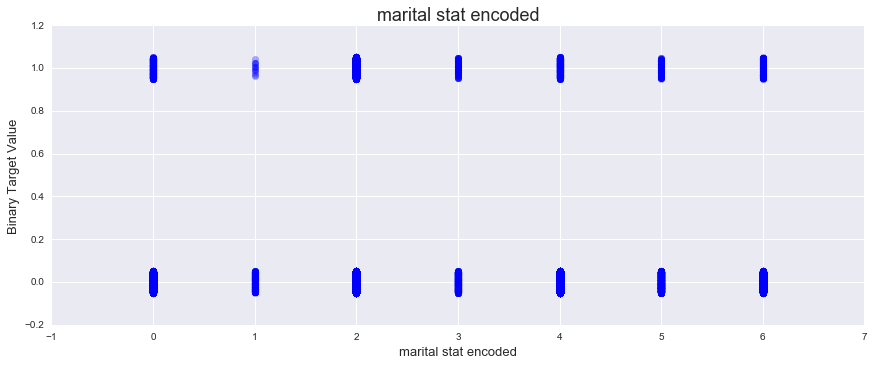

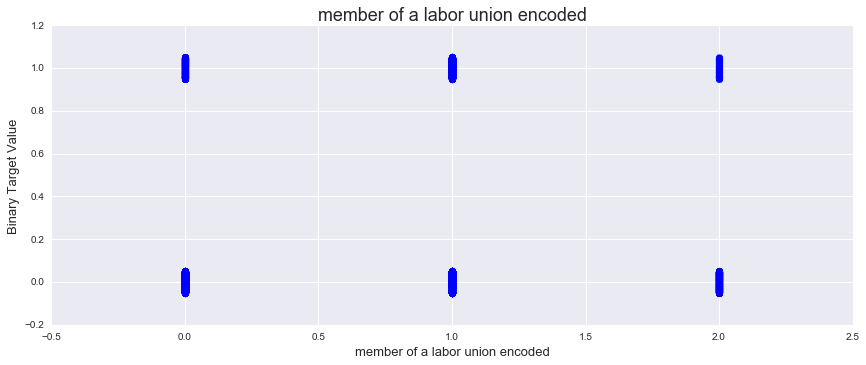

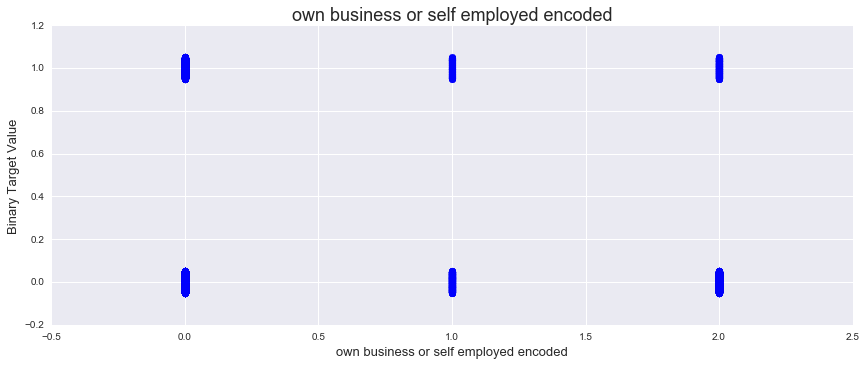

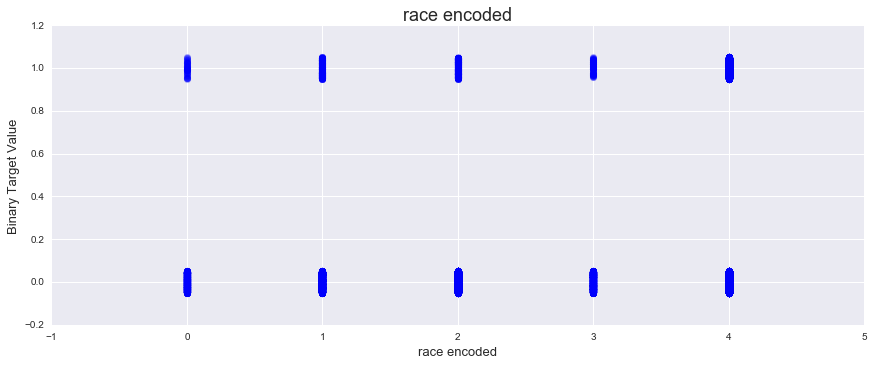

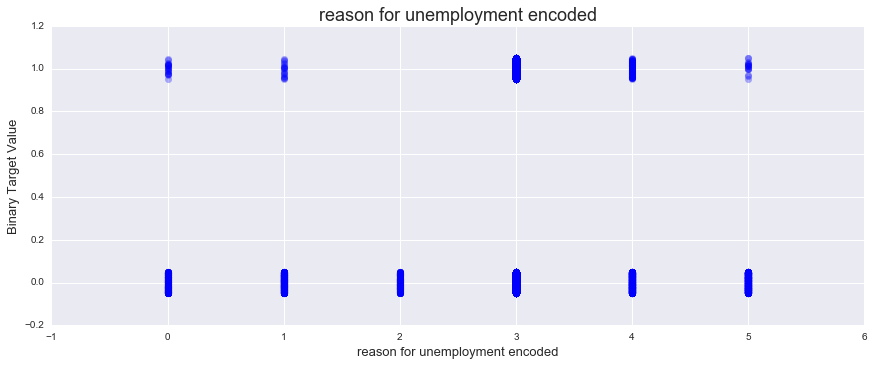

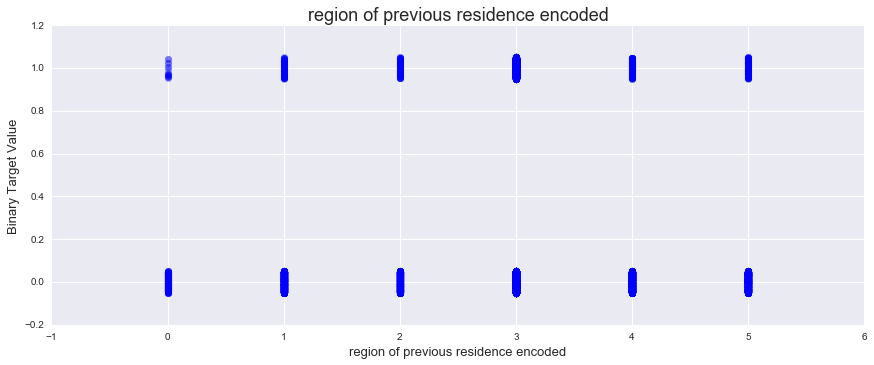

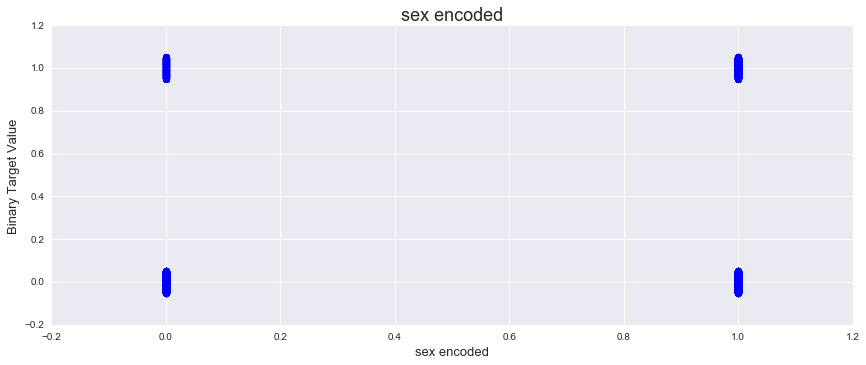

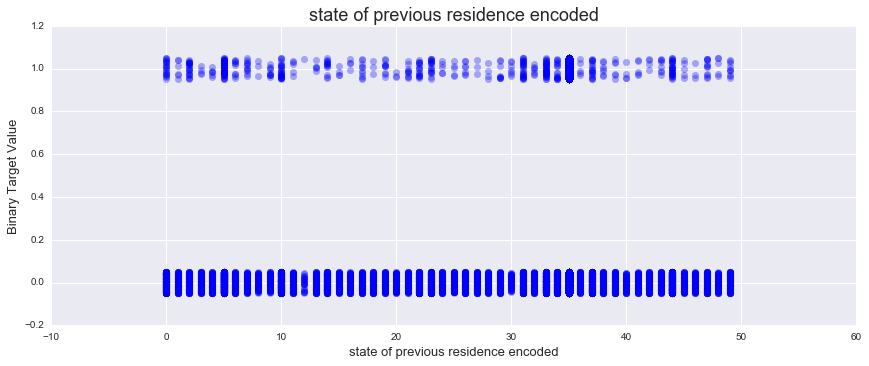

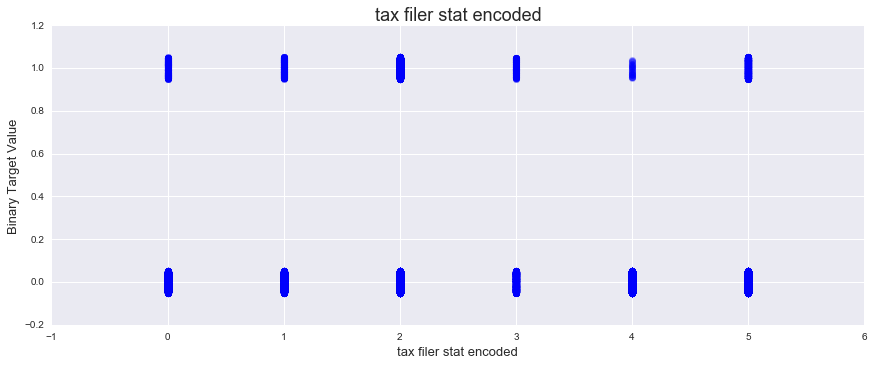

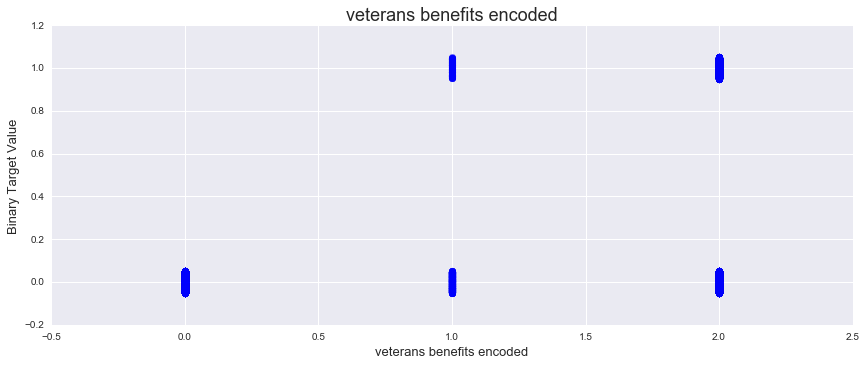

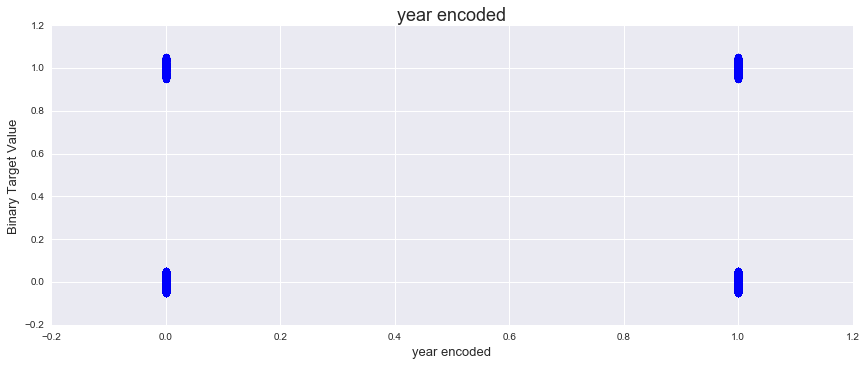

In [97]:
for label in cens.columns:
    if "encoded" in label:
        ax = sns.lmplot(x=label, y="target", data=cens, fit_reg=False, y_jitter=0.05, scatter_kws={'alpha':0.3, "s":50, "color":"blue"})
        ax = plt.gca()
        ax.figure.set_size_inches(14,5)
        ax.set_title(label, size = 18)
        ax.set_xlabel(label, size = 13)
        ax.set_ylabel("Binary Target Value", size = 13)
        plt.show()

Things that matter:
    - class of worker
    - country of birth
    - detailed household summary
    - detailed occupation
    - detailed industry
    - education
    - enrolled in ed
    - family under 18
    - hispanic origin
    - major industry code
    - major occupation
    - reason for unemployment
    - state of previous residence
    - veterans benefits

In [31]:
#lets try to clean this up
new_labels = []

for label in cens.columns:
    if "encoded" in label:
        new_labels.append(label)

new_labels.extend(numerical)
new_labels.append("target")

In [32]:
cens_df = cens[new_labels]

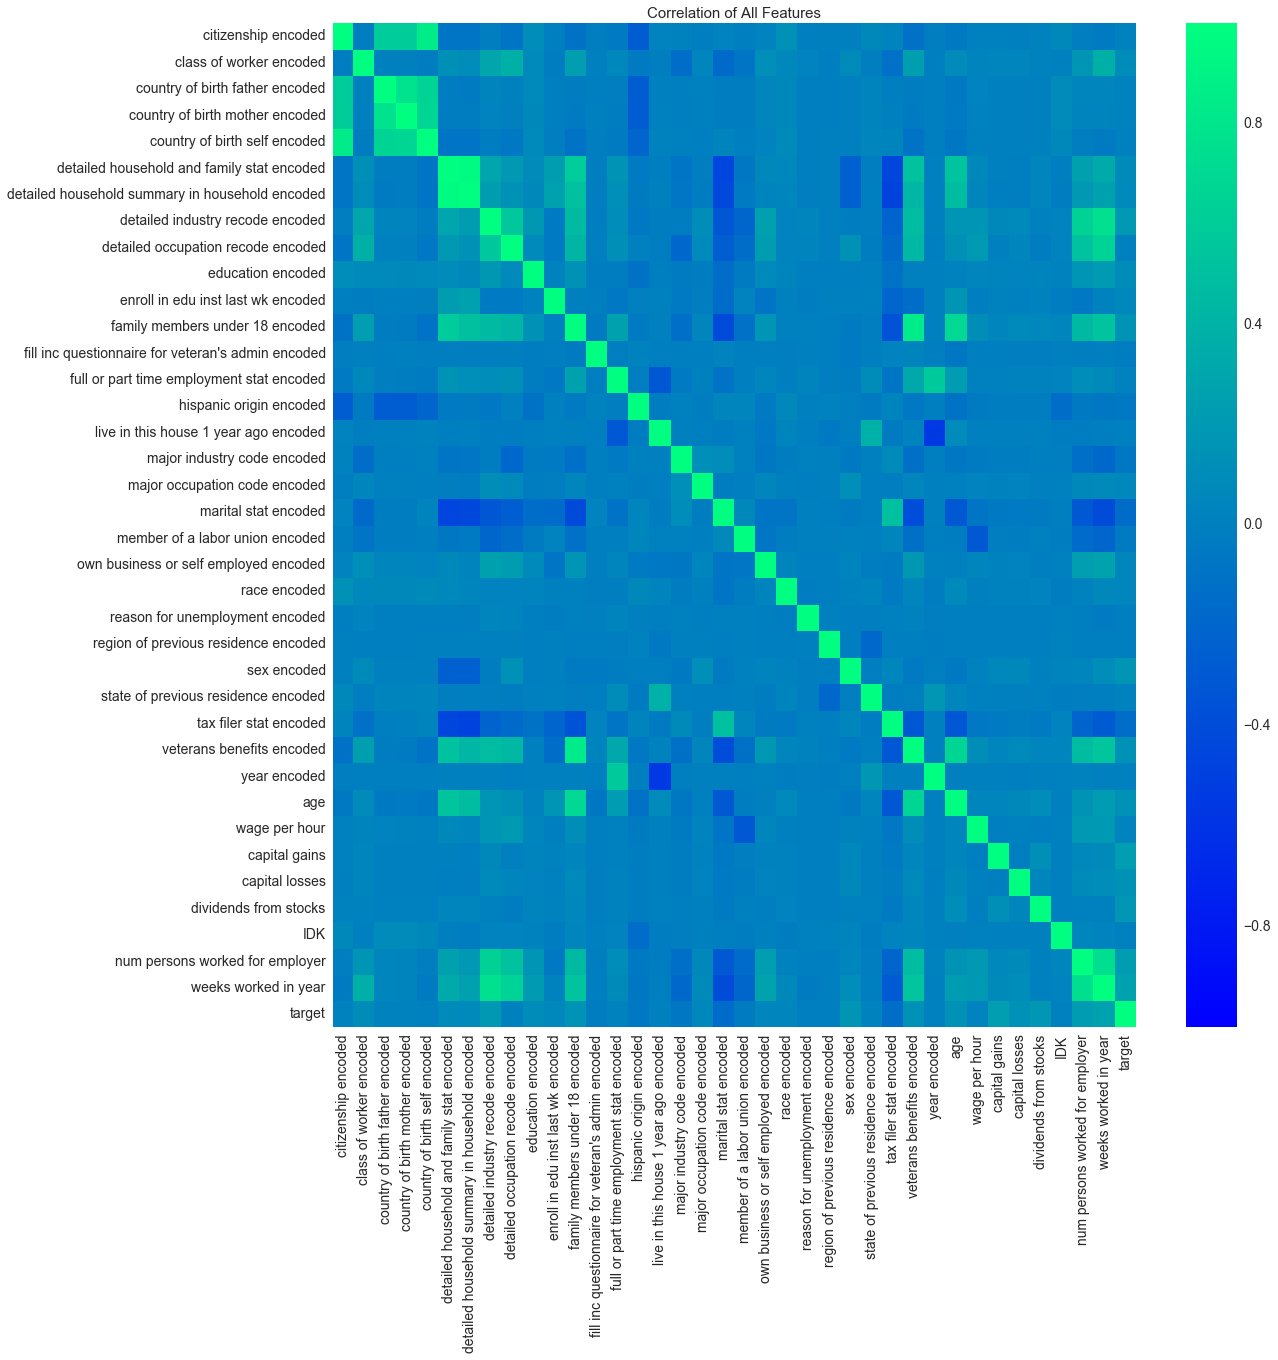

In [40]:
#lets try correlation matrix

plt.figure(figsize=(18, 18))
sns.set(font_scale=1.4)
ax = sns.heatmap(cens_df.corr(), cmap = "winter")

ax.axes.set_title("Correlation of All Features", size = 15)

plt.show()

#seems like there could be a lot of collinearity happening

In [41]:
cens_df.corr().abs()["target"].sort_values(ascending = False)

#this will be super helpful for model building later - can cut off after a few correlations.

target                                                1.000000
weeks worked in year                                  0.260653
capital gains                                         0.239853
num persons worked for employer                       0.221900
detailed industry recode encoded                      0.193925
dividends from stocks                                 0.175438
sex encoded                                           0.156335
marital stat encoded                                  0.154077
family members under 18 encoded                       0.151647
capital losses                                        0.147426
veterans benefits encoded                             0.141038
age                                                   0.138044
tax filer stat encoded                                0.136827
class of worker encoded                               0.098176
education encoded                                     0.096694
detailed household and family stat encoded            0

In [102]:
for col in cens_df.columns:
    print col
    print cens_df.corr().abs()[col].sort_values(ascending = False)
    print ""

#the one that is super collinear would be the detailed househoold stats
#stats does better than summary so should remove that one.

citizenship encoded
citizenship encoded                                   1.000000
country of birth self encoded                         0.845477
country of birth mother encoded                       0.598527
country of birth father encoded                       0.592467
hispanic origin encoded                               0.276540
race encoded                                          0.145226
veterans benefits encoded                             0.110860
education encoded                                     0.105355
family members under 18 encoded                       0.104516
detailed household and family stat encoded            0.093386
detailed household summary in household encoded       0.091771
detailed occupation recode encoded                    0.083367
state of previous residence encoded                   0.066979
IDK                                                   0.065195
age                                                   0.047309
full or part time employment stat e

In [33]:
#removing collinear factors

del cens_df["detailed household summary in household encoded"] 

### Begin to test model builds

In [34]:
#load in appropriate packages

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, roc_auc_score, recall_score
from sklearn.feature_selection import SelectKBest, f_classif

In [35]:
#first balance everything since the over +50K sample is so far off

cens_df = cens_df.sort_values("target")
cens_df.reset_index(inplace = True)
del cens_df["index"]

In [36]:
#identify the length of the +50K target

len(cens_df[cens_df["target"] == 1])

11657

In [118]:
#take a random sample of the same length of the -50K target
import random

balanced_samp = random.sample(range(0,178904), 11657)

In [79]:
len(balanced_samp)*2

23314

In [119]:
#add on the indices of the other sample as well

balanced_samp.extend(list(cens_df[-11657:].index))

In [120]:
#check the length

len(balanced_samp)

23314

In [121]:
#apply these new indices to a new set

cens_mod = cens_df.iloc[balanced_samp]

In [109]:
#works well

print 0, len(cens_mod[cens_mod["target"] == 0])
print 1, len(cens_mod[cens_mod["target"] == 1])

0 11657
1 11657


Try all features first

In [94]:
#set the ys and xs for all features first

X_all = cens_mod.iloc[:,:36]
y = cens_mod["target"]

In [114]:
#scale and split 

X_all_scale = StandardScaler().fit_transform(X_all)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_scale, y, test_size=0.20, stratify = y) 

In [115]:
#try the logistic regression first

lr = LogisticRegression()
model_lr = lr.fit(X_train_all, y_train_all)
predictions_lr = lr.predict(X_test_all)
print "accuracy: ", accuracy_score(y_test_all, predictions_lr)

#actually not bad

accuracy:  0.84749034749


In [116]:
#lets try random forest

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_all, y_train_all)
rf_predict = rf_model.predict(X_test_all)
print "accuracy: ", accuracy_score(y_test_all, rf_predict)

#not far off

accuracy:  0.859931359931


In [117]:
#lets try gradient boosting

gb = GradientBoostingClassifier()
gb_model = gb.fit(X_train_all, y_train_all)
gb_predict = gb_model.predict(X_test_all)
print "accuracy: ", accuracy_score(y_test_all, gb_predict)

#even better

accuracy:  0.878592878593


In [118]:
gb_cm = confusion_matrix(y_test_all, gb_predict, labels=gb_model.classes_)
gb_cm = pd.DataFrame(gb_cm, columns=gb_model.classes_, index=gb_model.classes_)
gb_cm

,0,1
0,1974,357
1,209,2122


In [119]:
print classification_report(y_test_all, gb_predict)
#slightly better

             precision    recall  f1-score   support

          0       0.90      0.85      0.87      2331
          1       0.86      0.91      0.88      2331

avg / total       0.88      0.88      0.88      4662



Try only some features - first feature selection

In [120]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k = 20)
selected_data = selector.fit_transform(X_all_scale, y)
kbest_columns = X_all.columns[selector.get_support()]
Xbest = pd.DataFrame(selected_data, columns=kbest_columns)
Xbest.columns

Index([u'class of worker encoded',
       u'detailed household and family stat encoded',
       u'detailed industry recode encoded', u'education encoded',
       u'enroll in edu inst last wk encoded',
       u'family members under 18 encoded', u'hispanic origin encoded',
       u'major industry code encoded', u'major occupation code encoded',
       u'marital stat encoded', u'race encoded', u'sex encoded',
       u'tax filer stat encoded', u'veterans benefits encoded', u'age',
       u'capital gains', u'capital losses', u'dividends from stocks',
       u'num persons worked for employer', u'weeks worked in year'],
      dtype='object')

In [121]:
#set it as X
X_best = cens_mod[Xbest.columns]

In [122]:
#scale and test-train-split
X_best_scale = StandardScaler().fit_transform(X_best)
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best_scale, y, test_size=0.20, stratify = y) 

In [123]:
#try the logistic regression first

lr = LogisticRegression()
model_lr = lr.fit(X_train_best, y_train_best)
predictions_lr = lr.predict(X_test_best)
print "accuracy: ", accuracy_score(y_test_best, predictions_lr)

accuracy:  0.825611325611


In [124]:
#lets try random forest

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_best, y_train_best)
rf_predict = rf_model.predict(X_test_best)
print "accuracy: ", accuracy_score(y_test_best, rf_predict)

#not far off

accuracy:  0.850707850708


In [125]:
#lets try gradient boosting

gb = GradientBoostingClassifier()
gb_model = gb.fit(X_train_best, y_train_best)
gb_predict = gb_model.predict(X_test_best)
print "accuracy: ", accuracy_score(y_test_best, gb_predict)

#even better

accuracy:  0.867867867868


Try Katty self selection based off of the correlation matrix

In [122]:
X_kat = cens_mod[cens_df.corr().abs()["target"].sort_values(ascending = False).index[1:35]]

In [123]:
#scale and test-train-split
X_kat_scale = StandardScaler().fit_transform(X_kat)
X_train_kat, X_test_kat, y_train_kat, y_test_kat = train_test_split(X_kat_scale, y, test_size=0.20, stratify = y) 

In [128]:
#try the logistic regression first

lr = LogisticRegression()
model_lr = lr.fit(X_train_kat, y_train_kat)
predictions_lr = lr.predict(X_test_kat)
print "accuracy: ", accuracy_score(y_test_kat, predictions_lr)

accuracy:  0.854783354783


In [129]:
#lets try random forest

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_kat, y_train_kat)
rf_predict = rf_model.predict(X_test_kat)
print "accuracy: ", accuracy_score(y_test_kat, rf_predict)

#not far off

accuracy:  0.859073359073


In [47]:
#lets try gradient boosting

gb = GradientBoostingClassifier()
gb_model = gb.fit(X_train_kat, y_train_kat)
gb_predict = gb_model.predict(X_test_kat)
print "accuracy: ", accuracy_score(y_test_kat, gb_predict)

#even better

accuracy:  0.872586872587


Best performing one is the features with the less than 2 features with a gradient boosting classifier

### Finetune the model

In [133]:
#attempted to do gridsearch but it took too long - going to tune the parameters manually

gb_params = {'n_estimators': [50, 100, 200, 300, 500],
                  'max_depth': [1,3,5,15,25,75],
                  'max_features': [.25, .50, .75, 1.0]}

In [132]:
for val in gb_params["n_estimators"]:
    gb = GradientBoostingClassifier(n_estimators = val)
    gb_model = gb.fit(X_train_kat, y_train_kat)
    gb_predict = gb_model.predict(X_test_kat)
    print "accuracy: ", "n_estimators", val, accuracy_score(y_test_kat, gb_predict)

accuracy:  n_estimators 50 0.871728871729
accuracy:  n_estimators 100 0.878163878164
accuracy:  n_estimators 200 0.882882882883
accuracy:  n_estimators 300 0.885456885457
accuracy:  n_estimators 500 0.8861003861


In [134]:
for val in gb_params["max_depth"]:
    gb = GradientBoostingClassifier(max_depth = val)
    gb_model = gb.fit(X_train_kat, y_train_kat)
    gb_predict = gb_model.predict(X_test_kat)
    print "accuracy: ", "max_depth", val, accuracy_score(y_test_kat, gb_predict)

accuracy:  max_depth 1 0.862934362934
accuracy:  max_depth 3 0.878163878164
accuracy:  max_depth 5 0.883526383526
accuracy:  max_depth 15 0.870656370656
accuracy:  max_depth 25 0.835049335049
accuracy:  max_depth 75 0.831188331188


In [135]:
for val in gb_params["max_features"]:
    gb = GradientBoostingClassifier(max_features = val)
    gb_model = gb.fit(X_train_kat, y_train_kat)
    gb_predict = gb_model.predict(X_test_kat)
    print "accuracy: ", "max_features", val, accuracy_score(y_test_kat, gb_predict)

#this doesn't look like it improves anything by too much

accuracy:  max_features 0.25 0.87752037752
accuracy:  max_features 0.5 0.87987987988
accuracy:  max_features 0.75 0.879236379236
accuracy:  max_features 1.0 0.878163878164


In [124]:
gb = GradientBoostingClassifier(n_estimators = 500)
gb_model = gb.fit(X_train_kat, y_train_kat)
gb_predict = gb_model.predict(X_test_kat)
print "accuracy: ", accuracy_score(y_test_kat, gb_predict)

#use this as the final model - this performed slightly better with out the max depth as well

accuracy:  0.881595881596


### Understand the model

In [49]:
#lets take a look at feature importances

importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]

In [51]:
print("Feature ranking:")

for f in range(X_kat.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 32 (0.110835)
2. feature 31 (0.087448)
3. feature 10 (0.087260)
4. feature 3 (0.062069)
5. feature 13 (0.057426)
6. feature 4 (0.053083)
7. feature 23 (0.052056)
8. feature 1 (0.049493)
9. feature 0 (0.048876)
10. feature 8 (0.043736)
11. feature 16 (0.040160)
12. feature 15 (0.036027)
13. feature 12 (0.031837)
14. feature 14 (0.027363)
15. feature 28 (0.027084)
16. feature 2 (0.022352)
17. feature 11 (0.021468)
18. feature 25 (0.017454)
19. feature 27 (0.015862)
20. feature 5 (0.015590)
21. feature 19 (0.014508)
22. feature 17 (0.013704)
23. feature 6 (0.013146)
24. feature 26 (0.012085)
25. feature 20 (0.008690)
26. feature 33 (0.008253)
27. feature 22 (0.007110)
28. feature 21 (0.006470)
29. feature 29 (0.003056)
30. feature 9 (0.002985)
31. feature 24 (0.001336)
32. feature 18 (0.000618)
33. feature 30 (0.000410)
34. feature 7 (0.000151)


In [52]:
#these are the features that matter the most

print X_kat.columns[32]
print X_kat.columns[31]
print X_kat.columns[10]
print X_kat.columns[3]
print X_kat.columns[13]

IDK
detailed occupation recode encoded
age
detailed industry recode encoded
education encoded


### Load in the test set to evalate

First need to clean the data set in the way we did before

In [53]:
#load in the test set

cen_test = pd.read_csv("./data/census_income_test.csv")

In [54]:
#shift everything down

cen_test.loc[99761] = "boop"
cen_test = cen_test.shift(1)

In [55]:
#set the first row equal to the columns
cen_test.loc[0] = cen_test.columns

In [56]:
#set columns as the new columns pulled from metdata
cen_test.columns = new_cols

In [57]:
#drop the columns that we didnt use before

cen_test = cen_test.drop(['migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'migration prev res in sunbelt'], axis = 1)

In [150]:
#check for the values

for columns in cen_test.columns:
    print columns
    print cen_test[columns].value_counts()
    print ""

age
33    1750
34    1721
4     1683
35    1670
3     1667
37    1646
5     1642
38    1637
32    1628
30    1615
7     1608
31    1605
39    1603
40    1589
12    1581
36    1572
14    1562
8     1561
11    1557
2     1554
13    1538
42    1530
6     1528
41    1520
10    1516
9     1513
1     1503
28    1499
27    1461
15    1459
      ... 
60     761
66     756
63     752
64     750
61     749
68     732
67     714
71     710
70     709
72     698
69     685
73     652
74     615
76     562
75     558
77     479
78     440
79     422
80     399
90     373
81     336
82     324
83     276
84     267
85     216
86     162
87     155
88     141
89     109
38       1
Name: age, dtype: int64

class of worker
 Not in universe                   50079
 Private                           36071
 Self-employed-not incorporated     4280
 Local government                   3833
 State government                   2167
 Self-employed-incorporated         1648
 Federal government                 14

In [58]:
cen_test["year"] = cen_test["year"].apply(lambda x: 95 if " 95" == x else int(x)) 
cen_test["weeks worked in year"] = cen_test["weeks worked in year"].apply(lambda x: 12 if " 12" == x else int(x)) 
cen_test["veterans benefits"] = cen_test["veterans benefits"].apply(lambda x: 2 if " 2" == x else int(x)) 
cen_test["fill inc questionnaire for veteran's admin"] = cen_test["fill inc questionnaire for veteran's admin"].apply(lambda x: " Not in universe" if " Not in universe.6" == x else x) 
cen_test["own business or self employed"] = cen_test["own business or self employed"].apply(lambda x: 0 if " 0.4" == x else int(x)) 
cen_test["country of birth self"] = cen_test["country of birth self"].apply(lambda x: " Mexico" if " Mexico.2" == x else x) 
cen_test["country of birth mother"] = cen_test["country of birth mother"].apply(lambda x: " Mexico" if " Mexico.1" == x else x) 
cen_test["family members under 18"] = cen_test["family members under 18"].apply(lambda x: " Not in universe" if " Not in universe.5" == x else x) 
cen_test["num persons worked for employer"] = cen_test["num persons worked for employer"].apply(lambda x: 4 if " 4" == x else int(x)) 
cen_test["detailed household summary in household"] = cen_test["detailed household summary in household"].apply(lambda x: " Spouse of householder" if " Spouse of householder.1" == x else x) 
cen_test["state of previous residence"] = cen_test["state of previous residence"].apply(lambda x: " Not in universe" if " Not in universe.4" == x else x) 
cen_test["region of previous residence"] = cen_test["region of previous residence"].apply(lambda x: " Not in universe" if " Not in universe.3" == x else x) 
cen_test["capital losses"] = cen_test["capital losses"].apply(lambda x: 0 if " 0.2" == x else int(x)) 
cen_test["capital gains"] = cen_test["capital gains"].apply(lambda x: 0 if " 0.1" == x else int(x)) 
cen_test["reason for unemployment"] = cen_test["reason for unemployment"].apply(lambda x: " Not in universe" if " Not in universe.2" == x else x) 
cen_test["member of a labor union"] = cen_test["member of a labor union"].apply(lambda x: " Not in universe" if " Not in universe.1" == x else x) 
cen_test["detailed occupation recode"] = cen_test["detailed occupation recode"].apply(lambda x: 36 if " 36" == x else int(x)) 

In [59]:
#change these to null values

cen_test = cen_test.applymap(lambda x: np.nan if x == " ?" else x)
cen_test = cen_test.applymap(lambda x: np.nan if x == "?" else x)

In [60]:
#check for null values

cen_test.isnull().sum()/len(cen_test)

#not that many nulls - drop these values

age                                           0.000000
class of worker                               0.000000
detailed industry recode                      0.000000
detailed occupation recode                    0.000000
education                                     0.000000
wage per hour                                 0.000000
enroll in edu inst last wk                    0.000000
marital stat                                  0.000000
major industry code                           0.000000
major occupation code                         0.000000
race                                          0.000000
hispanic origin                               0.000000
sex                                           0.000000
member of a labor union                       0.000000
reason for unemployment                       0.000000
full or part time employment stat             0.000000
capital gains                                 0.000000
capital losses                                0.000000
dividends 

In [61]:
#drop nas

cen_test = cen_test.dropna()

In [62]:
#delete one more column before we encode:

del cen_test["detailed household summary in household"] 

In [63]:
#encode everything

for cols in cen_test.columns[:-1] - cen_test[numerical].columns:
    new_label = cols + " encoded"
    le = LabelEncoder()
    le.fit(cen_test[cols])
    cen_test[new_label] = le.transform(cen_test[cols])

/Users/katty/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [64]:
#change the target variable

cen_test["target"] = cen_test["+/- 5000"].apply(lambda x: 0 if x == " - 50000." else 1)

In [125]:
X_test_fin = cen_test[list(cens_mod[cens_df.corr().abs()["target"].sort_values(ascending = False).index[1:35]])]

In [126]:
y_test_fin = cen_test["target"]

In [127]:
#run the model

gb_predict_fin = gb_model.predict(X_test_fin)
print "accuracy: ", accuracy_score(y_test_fin, gb_predict_fin)

#use this as the final model

accuracy:  0.328845386377


In [128]:
#lets look t the confusion matrix

gb_cm = confusion_matrix(y_test_fin, gb_predict_fin, labels=gb_model.classes_)
gb_cm = pd.DataFrame(gb_cm, columns=gb_model.classes_, index=gb_model.classes_)
gb_cm

,0,1
0,27091,62318
1,1588,4221


In [129]:
print classification_report(y_test_fin, gb_predict_fin)

             precision    recall  f1-score   support

          0       0.94      0.30      0.46     89409
          1       0.06      0.73      0.12      5809

avg / total       0.89      0.33      0.44     95218



In [163]:
print float(len(cen_test[cen_test["target"]==1])) / len(cen_test)

0.0610073725556


Even with a resampled train set, it looks like the model was very bad at predicting values of above 50K. The model was barely better at predicting better than baseline for values that are above 50K. 

### Analysis on what makes people 50K different than under 50K

Let's focus on the original train set just because there are more there than the test.

In [52]:
#i tried to run the whoel thing in a for loop and it would not function - am doing this manually
cens.columns

Index([u'age', u'class of worker', u'detailed industry recode',
       u'detailed occupation recode', u'education', u'wage per hour',
       u'enroll in edu inst last wk', u'marital stat', u'major industry code',
       u'major occupation code', u'race', u'hispanic origin', u'sex',
       u'member of a labor union', u'reason for unemployment',
       u'full or part time employment stat', u'capital gains',
       u'capital losses', u'dividends from stocks', u'tax filer stat',
       u'region of previous residence', u'state of previous residence',
       u'detailed household and family stat',
       u'detailed household summary in household', u'IDK',
       u'live in this house 1 year ago', u'num persons worked for employer',
       u'family members under 18', u'country of birth father',
       u'country of birth mother', u'country of birth self', u'citizenship',
       u'own business or self employed',
       u'fill inc questionnaire for veteran's admin', u'veterans benefits',
       u'

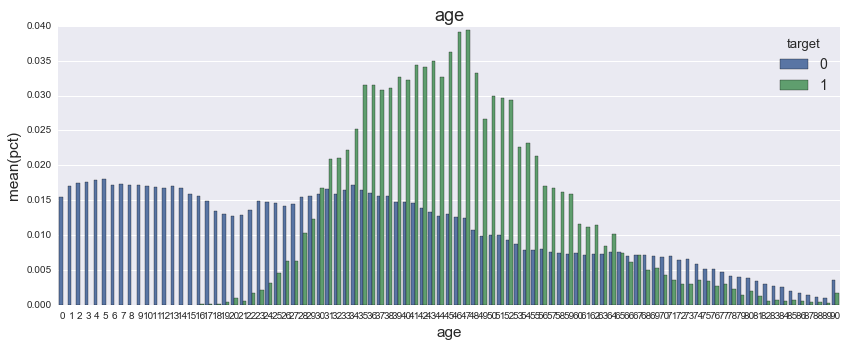

In [72]:
#start with age
age = cens.groupby(["age", "target"])["age"].count().to_frame("count").reset_index()
age["pct"] = age.groupby(["target"])["count"].apply(lambda x: x / sum(x))
age = age.sort_values("age")
ax = sns.barplot(x="age", y="pct", hue="target", data=age)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("age", size = 18)
ax.tick_params(labelsize=10)
plt.show()

In [67]:
#return the highes concentration of ages for under 50K
age[age["target"] == 0].sort_values("pct", ascending = False)

,age,target,count,pct
5,5,0,3221,0.018004
4,4,0,3196,0.017864
3,3,0,3157,0.017646
2,2,0,3132,0.017507
7,7,0,3101,0.017333
8,8,0,3077,0.017199
6,6,0,3072,0.017171
9,9,0,3071,0.017166
52,34,0,3066,0.017138
10,10,0,3059,0.017099


In [68]:
#return the highes concentration of ages for over 50K
age[age["target"] == 1].sort_values("pct", ascending = False)

,age,target,count,pct
79,47,1,459,0.039375
77,46,1,456,0.039118
75,45,1,423,0.036287
71,43,1,408,0.035000
67,41,1,400,0.034314
69,42,1,398,0.034143
81,48,1,387,0.033199
73,44,1,381,0.032684
63,39,1,380,0.032598
65,40,1,375,0.032170


People who make 50K+ tend to be older and more normally distributed. The most common age is people who are in their 40s vs those who make less than 50K tend to be children or in their early 30s. 

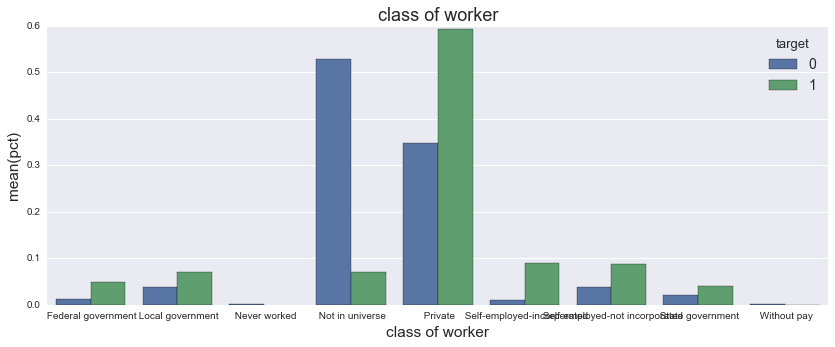

In [73]:
cow = cens.groupby(["class of worker", "target"])["class of worker"].count().to_frame("count").reset_index()
cow["pct"] = cow.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="class of worker", y="pct", hue="target", data=cow)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("class of worker", size = 18)
ax.tick_params(labelsize=10)
plt.show()

Those who make 50K are more likely to work (unsurprisingly) and the bulk of them are working in Private sector like those under 50K. They are more likely to be self-employed as well.

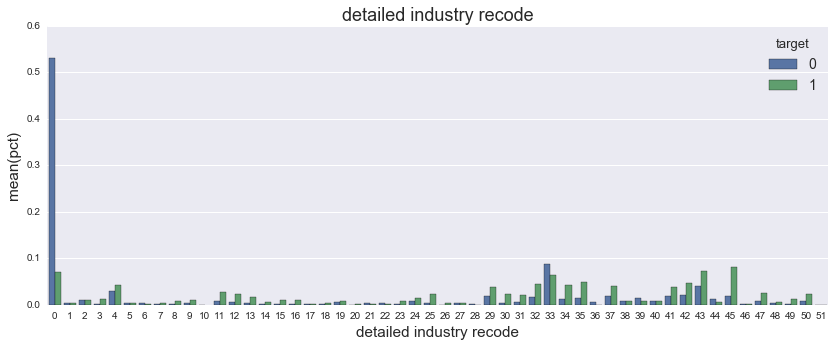

In [74]:
direcode = cens.groupby(["detailed industry recode", "target"])["detailed industry recode"].count().to_frame("count").reset_index()
direcode["pct"] = direcode.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="detailed industry recode", y="pct", hue="target", data=direcode)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("detailed industry recode", size = 18)
ax.tick_params(labelsize=10)
plt.show()

It looks like 45 seems to be the most wildly disproportioned industry. According to industry codes, its the Accomodations industry.

https://www2.census.gov/programs-surveys/cps/methodology/Industry%20Codes.pdf

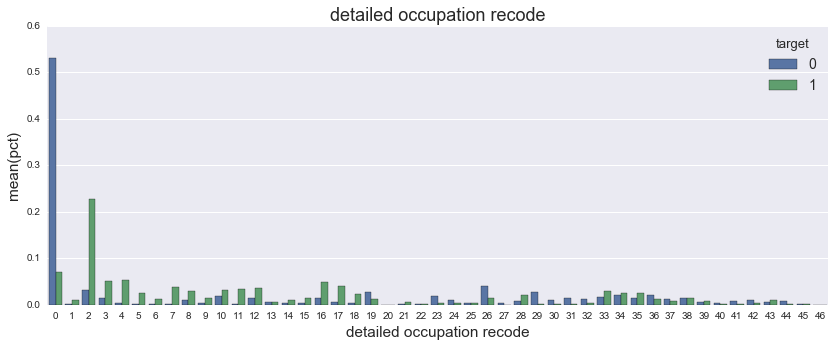

In [75]:
dorecode = cens.groupby(["detailed occupation recode", "target"])["detailed occupation recode"].count().to_frame("count").reset_index()
dorecode["pct"] = dorecode.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="detailed occupation recode", y="pct", hue="target", data=dorecode)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("detailed occupation recode", size = 18)
ax.tick_params(labelsize=10)
plt.show()

Occupation recode is definitely 2 for those above 50K - this is a manager and administrator position which makes sense for 50K+

https://www.federalreserve.gov/pubs/oss/oss2/83/occ802.pdf

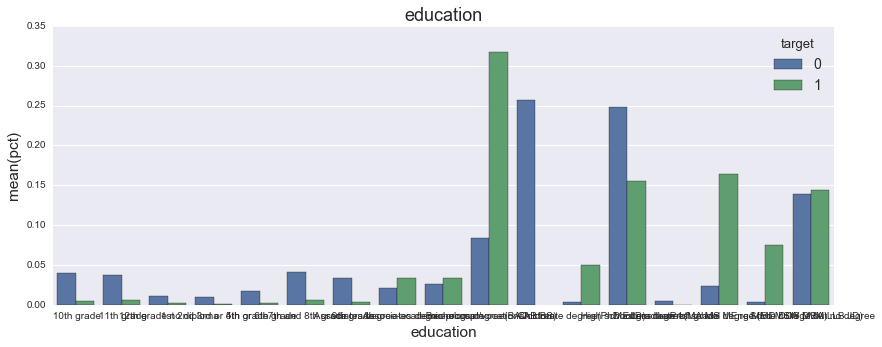

In [76]:
ed = cens.groupby(["education", "target"])["education"].count().to_frame("count").reset_index()
ed["pct"] = ed.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="education", y="pct", hue="target", data=ed)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("education", size = 18)
ax.tick_params(labelsize=10)
plt.show()

In [77]:
ed[ed["target"] == 1].sort_values("pct", ascending = False)

,education,target,count,pct
19,Bachelors degree(BA AB BS),1,3693,0.316805
28,Masters degree(MA MS MEng MEd MSW MBA),1,1920,0.164708
24,High school graduate,1,1808,0.155100
32,Some college but no degree,1,1683,0.144377
30,Prof school degree (MD DDS DVM LLB JD),1,876,0.075148
22,Doctorate degree(PhD EdD),1,584,0.050099
15,Associates degree-academic program,1,399,0.034228
17,Associates degree-occup /vocational,1,397,0.034057
3,11th grade,1,69,0.005919
11,7th and 8th grade,1,67,0.005748


The most prominent education for the 50K group is Bachelors and Masters

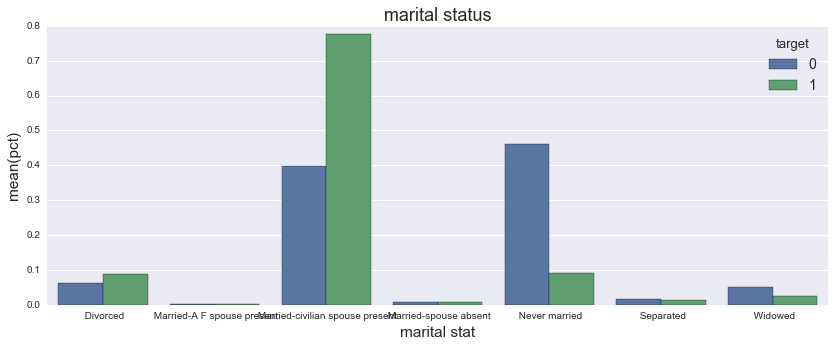

In [82]:
#wage per hour doenst yield anything so skipping it
#enroll in ed also doesn't show much

mart = cens.groupby(["marital stat", "target"])["marital stat"].count().to_frame("count").reset_index()
mart["pct"] = mart.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="marital stat", y="pct", hue="target", data=mart)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("marital status", size = 18)
ax.tick_params(labelsize=10)
plt.show()

In [83]:
mart[mart["target"] == 1].sort_values("pct", ascending = False)

,marital stat,target,count,pct
5,Married-civilian spouse present,1,9035,0.775071
9,Never married,1,1048,0.089903
1,Divorced,1,1014,0.086986
13,Widowed,1,308,0.026422
11,Separated,1,153,0.013125
7,Married-spouse absent,1,86,0.007378
3,Married-A F spouse present,1,13,0.001115


Majority tend to be in a marriage where both spouses are present

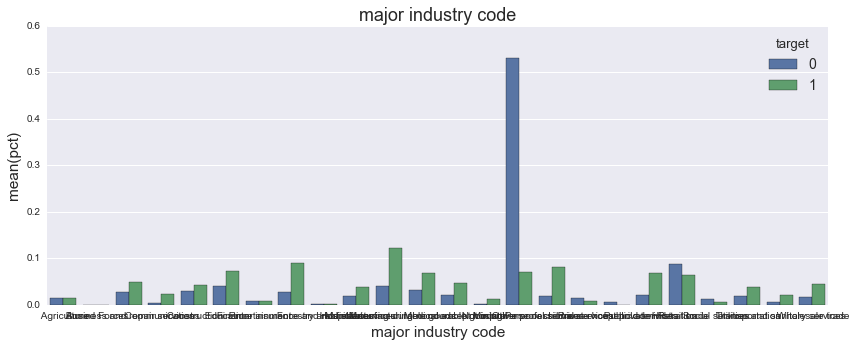

In [87]:
mic = cens.groupby(["major industry code", "target"])["major industry code"].count().to_frame("count").reset_index()
mic["pct"] = mic.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="major industry code", y="pct", hue="target", data=mic)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("major industry code", size = 18)
ax.tick_params(labelsize=10)
plt.show()

In [88]:
mic[mic["target"] == 1].sort_values("pct", ascending = False)

,major industry code,target,count,pct
21,Manufacturing-durable goods,1,1430,0.122673
15,Finance insurance and real estate,1,1060,0.090932
31,Other professional services,1,960,0.082354
11,Education,1,839,0.071974
29,Not in universe or children,1,821,0.070430
23,Manufacturing-nondurable goods,1,804,0.068971
37,Public administration,1,797,0.068371
39,Retail trade,1,749,0.064253
5,Business and repair services,1,571,0.048983
25,Medical except hospital,1,555,0.047611


50K income people tend to be in Manufacturing and Finance

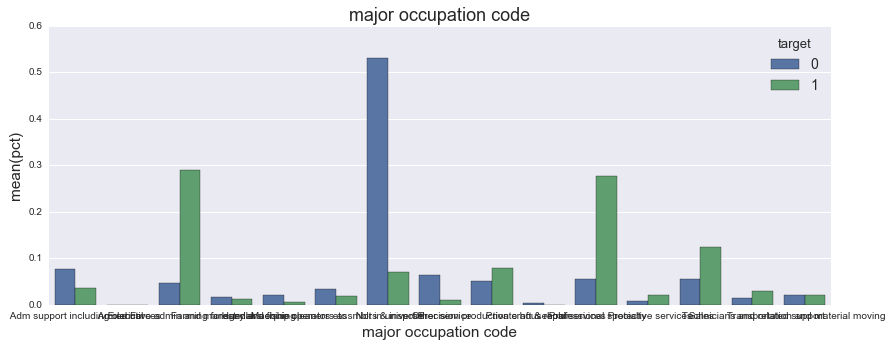

In [89]:
moc = cens.groupby(["major occupation code", "target"])["major occupation code"].count().to_frame("count").reset_index()
moc["pct"] = moc.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="major occupation code", y="pct", hue="target", data=moc)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("major occupation code", size = 18)
ax.tick_params(labelsize=10)
plt.show()

In [90]:
moc[moc["target"] == 1].sort_values("pct", ascending = False)

,major occupation code,target,count,pct
5,Executive admin and managerial,1,3384,0.290298
21,Professional specialty,1,3218,0.276057
25,Sales,1,1454,0.124732
17,Precision production craft & repair,1,928,0.079609
13,Not in universe,1,821,0.070430
1,Adm support including clerical,1,430,0.036888
27,Technicians and related support,1,340,0.029167
29,Transportation and material moving,1,255,0.021875
23,Protective services,1,252,0.021618
11,Machine operators assmblrs & inspctrs,1,225,0.019302


Similar to other data, those with 50K, they tend to be in executive and professional positions

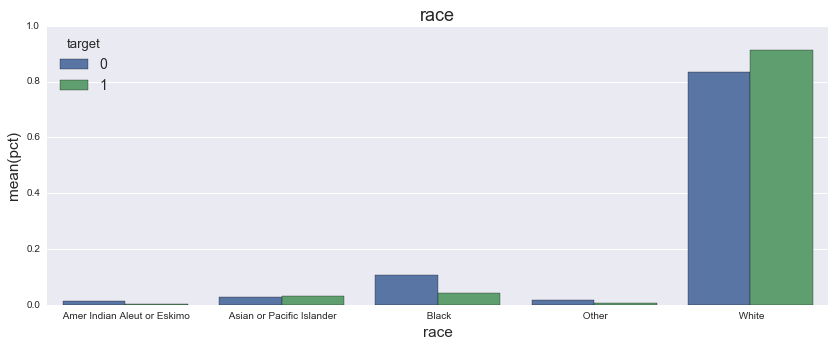

In [94]:
race = cens.groupby(["race", "target"])["race"].count().to_frame("count").reset_index()
race["pct"] = race.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="race", y="pct", hue="target", data=race)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("race", size = 18)
ax.tick_params(labelsize=10)
plt.show()

50K income earners are more white, and Asian

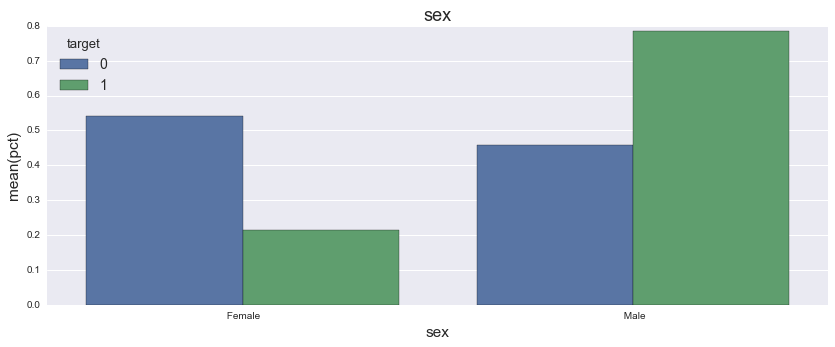

In [96]:
#hispanic origin didnt' say much

sex = cens.groupby(["sex", "target"])["sex"].count().to_frame("count").reset_index()
sex["pct"] = sex.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="sex", y="pct", hue="target", data=sex)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("sex", size = 18)
ax.tick_params(labelsize=10)
plt.show()

Much more likely to be male than under 50K respondents

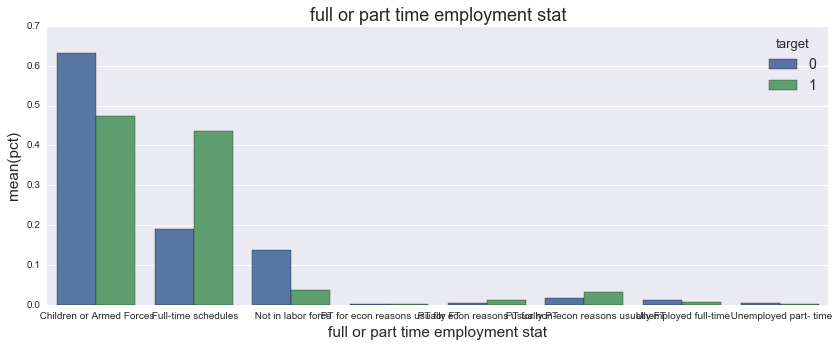

In [98]:
#hispanic origin didnt' say much
#labor union not compelling

emp = cens.groupby(["full or part time employment stat", "target"])["full or part time employment stat"].count().to_frame("count").reset_index()
emp["pct"] = emp.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="full or part time employment stat", y="pct", hue="target", data=emp)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("full or part time employment stat", size = 18)
ax.tick_params(labelsize=10)
plt.show()

Unsurprisingly most people work full time

In [121]:
#visualizing capital gains and losses is kind of difficult - lets look at the mean and median

print "capital gains <50K", cens[cens["target"]==0]["capital gains"].mean()
print "capital gains +50K", cens[cens["target"]==1]["capital gains"].mean()
print "capital losses <50K", cens[cens["target"]==0]["capital losses"].mean()
print "capital losses +50K", cens[cens["target"]==1]["capital losses"].mean()
print "dividends <50K", cens[cens["target"]==0]["dividends from stocks"].mean()
print "dividends +50K", cens[cens["target"]==1]["dividends from stocks"].mean()
print "IDK < 50K", cens[cens["target"]==0]["IDK"].mean()
print "IDK < +50K", cens[cens["target"]==1]["IDK"].mean()

capital gains <50K 140.965842016
capital gains +50K 4756.35712447
capital losses <50K 26.7504080401
capital losses +50K 192.760573046
dividends <50K 103.597951974
dividends +50K 1540.01269623
IDK < 50K 1738.15371395
IDK < +50K 1797.35455606


People with over 50K tend to have significantly more capital gains, losses and dividends as well

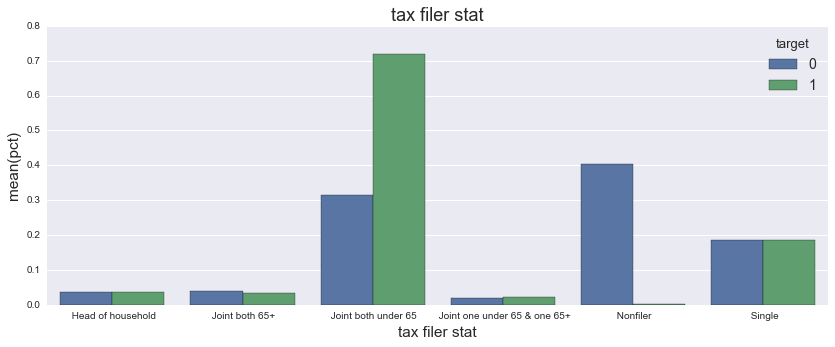

In [104]:
tax = cens.groupby(["tax filer stat", "target"])["tax filer stat"].count().to_frame("count").reset_index()
tax["pct"] = tax.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="tax filer stat", y="pct", hue="target", data=tax)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("tax filer stat", size = 18)
ax.tick_params(labelsize=10)
plt.show()

People with 50K+ to do joint filing under 65 vs all other tax statuses

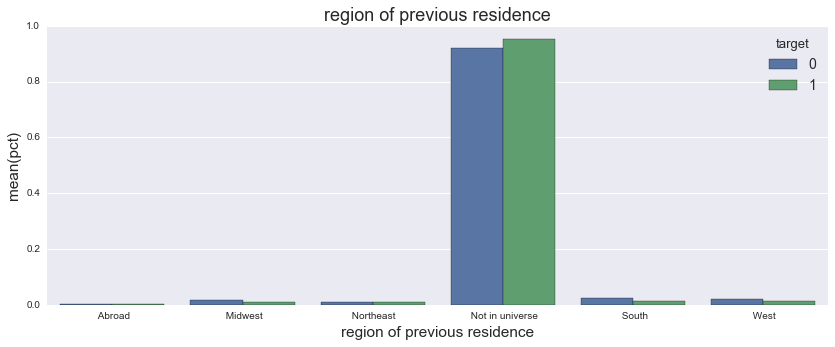

In [105]:
regi = cens.groupby(["region of previous residence", "target"])["region of previous residence"].count().to_frame("count").reset_index()
regi["pct"] = regi.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="region of previous residence", y="pct", hue="target", data=regi)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("region of previous residence", size = 18)
ax.tick_params(labelsize=10)
plt.show()

In [108]:
regi.sort_values("region of previous residence", ascending = False)

,region of previous residence,target,count,pct
10,West,0,3767,0.021056
11,West,1,152,0.013039
8,South,0,4360,0.024371
9,South,1,161,0.013811
6,Not in universe,0,164948,0.921992
7,Not in universe,1,11106,0.952732
4,Northeast,0,2033,0.011364
5,Northeast,1,115,0.009865
2,Midwest,0,3370,0.018837
3,Midwest,1,106,0.009093


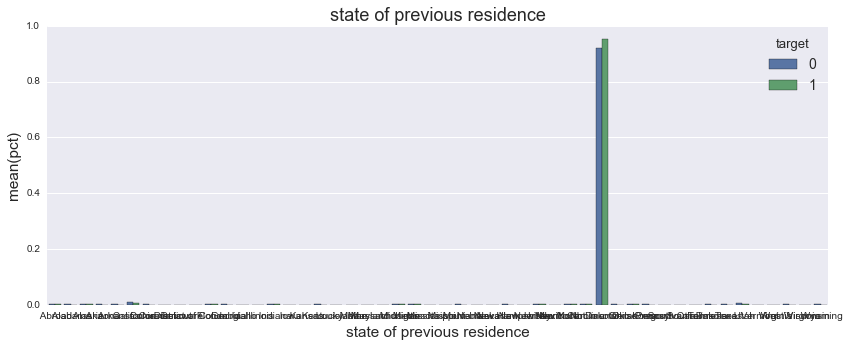

In [112]:
stat = cens.groupby(["state of previous residence", "target"])["state of previous residence"].count().to_frame("count").reset_index()
stat["pct"] = stat.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="state of previous residence", y="pct", hue="target", data=stat)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("state of previous residence", size = 18)
ax.tick_params(labelsize=10)
plt.show()

No real prominent state that sticks out

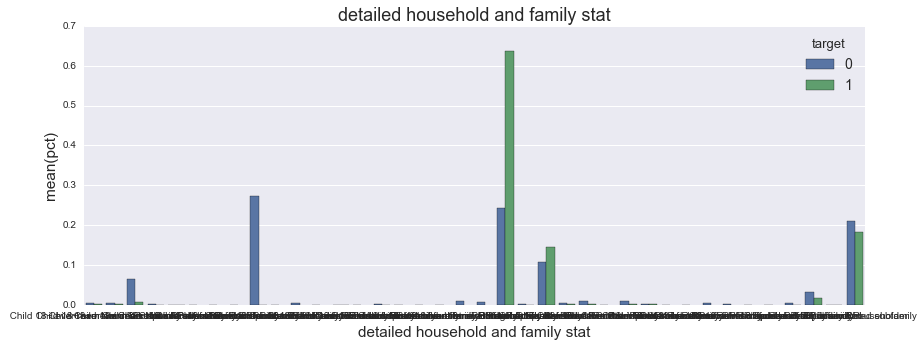

In [118]:
hhstat = cens.groupby(["detailed household and family stat", "target"])["detailed household and family stat"].count().to_frame("count").reset_index()
hhstat["pct"] = hhstat.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="detailed household and family stat", y="pct", hue="target", data=hhstat)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("detailed household and family stat", size = 18)
ax.tick_params(labelsize=10)
plt.show()

In [119]:
hhstat[hhstat["target"]==1].sort_values("pct", ascending = False)

,detailed household and family stat,target,count,pct
29,Householder,1,7411,0.635755
56,Spouse of householder,1,2131,0.182809
33,Nonfamily householder,1,1698,0.145664
52,Secondary individual,1,202,0.017329
5,Child 18+ never marr Not in a subfamily,1,84,0.007206
1,Child 18+ ever marr Not in a subfamily,1,23,0.001973
40,Other Rel 18+ never marr not in subfamily,1,20,0.001716
37,Other Rel 18+ ever marr not in subfamily,1,18,0.001544
42,Other Rel 18+ spouse of subfamily RP,1,18,0.001544
35,Other Rel 18+ ever marr RP of subfamily,1,16,0.001373


People with over 50K tend to be householders

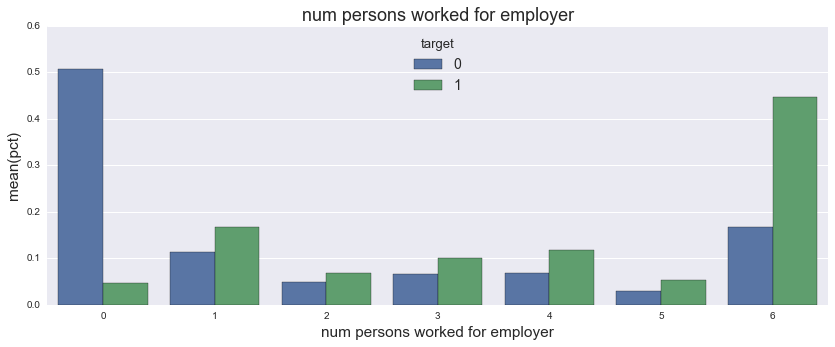

In [124]:
#live in this house 1 year ago not really that compelling

empsz = cens.groupby(["num persons worked for employer", "target"])["num persons worked for employer"].count().to_frame("count").reset_index()
empsz["pct"] = empsz.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="num persons worked for employer", y="pct", hue="target", data=empsz)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("num persons worked for employer", size = 18)
ax.tick_params(labelsize=10)
plt.show()

People with 50K are more likely to be at places with 6 employees

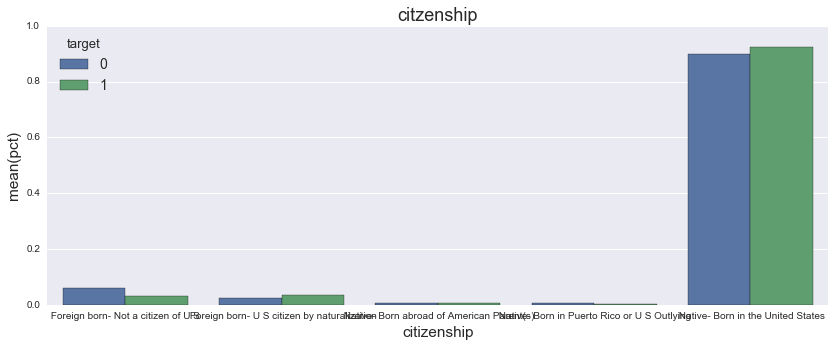

In [128]:
#family members under 18 doesn't really apply to those with 50K+
#birth countries don't seem to be too useful

citz = cens.groupby(["citizenship", "target"])["citizenship"].count().to_frame("count").reset_index()
citz["pct"] = citz.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="citizenship", y="pct", hue="target", data=citz)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("citzenship", size = 18)
ax.tick_params(labelsize=10)
plt.show()

More likely to be a Citizen 

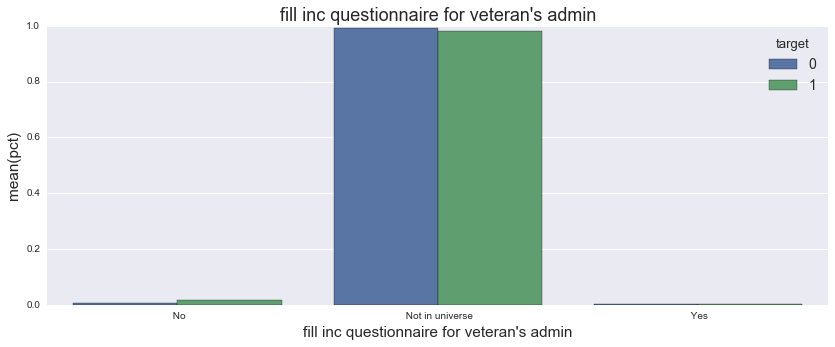

In [130]:
#own business didn't say too much

vetadmin = cens.groupby(["fill inc questionnaire for veteran's admin", "target"])["fill inc questionnaire for veteran's admin"].count().to_frame("count").reset_index()
vetadmin["pct"] = vetadmin.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="fill inc questionnaire for veteran's admin", y="pct", hue="target", data=vetadmin)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("fill inc questionnaire for veteran's admin", size = 18)
ax.tick_params(labelsize=10)
plt.show()

Not likely to be a veteran

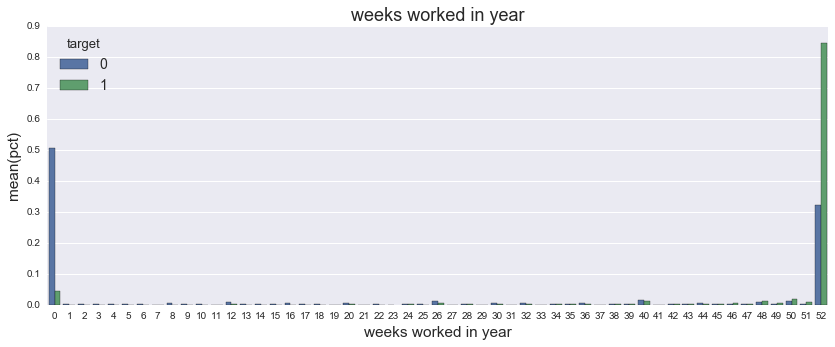

In [132]:
weekz = cens.groupby(["weeks worked in year", "target"])["weeks worked in year"].count().to_frame("count").reset_index()
weekz["pct"] = weekz.groupby(["target"])["count"].apply(lambda x: x / sum(x))
ax = sns.barplot(x="weeks worked in year", y="pct", hue="target", data=weekz)
ax = plt.gca()
ax.figure.set_size_inches(14,5)
ax.set_title("weeks worked in year", size = 18)
ax.tick_params(labelsize=10)
plt.show()

There is a small contingency of people who don't work at all who still have 50K+ but the majority are working full time